In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [2]:
plt.rcParams.update({'font.size': 20})
cmap = plt.get_cmap("tab10")
# cmap
cmap2 = plt.get_cmap("tab20b")

## DISPERSION VALUES

In [178]:
values_disp = [75.87,75.26,20.82,73.39,72.01,78.89,117.14,97.54,78.08,93.17,84.03,73.97,14.48,73.70,69.16,108.26,70.99,71.87,73.78,75.62,73.85,82.34,14.48,71.20,96.73,62.46,77.95,92.28,85.18,71.55,84.18,73.14,
         117.52,119.25,106.57,107.98,114.13,112.37,105.60,111.81,112.31,110.85,95.79,110.06,117.16,105.11,122.45,108.58,101.80,106.03,120.44,115.12,101.51,106.08,123.87,109.42,112.40,97.31,114.83,117.14,103.80,114.76,102.97,102.46,
         26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.96,26.33,26.33,26.33,26.97,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.36,26.33,26.33,26.33,25.35,26.33,32.20,26.33,26.33,26.33,26.33,26.10,26.33,26.33,26.33,25.94,30.73,26.33,27.93,26.33,26.33,27.59,28.39,26.33,26.86,26.33,26.54,25.66,26.33,26.86,26.33,26.22,38.20,26.33,26.36,26.96,26.36,26.35,31.50,33.66,30.07,32.85,29.17,26.33,26.33,26.33,26.33,26.33,26.33,26.36,26.33,26.36,26.14,26.33,32.97,33.11,30.58,26.36,50.92,30.72,26.33,26.33,26.33,26.33,27.14,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.48,26.33,26.33,26.33,26.33,27.04,27.53,26.33,26.97,26.33,26.33,26.33,26.33,26.33,28.00,26.66,29.77,28.96,26.33,27.29,28.65,28.54,26.97,25.02,25.91,26.33,26.33,35.23,26.33,26.33,26.33,26.35,28.06,26.33,42.37,42.27,29.17,30.07,30.00,41.11,29.64,39.67,45.76,39.25,29.72,31.31,28.09,26.55,31.53,29.58,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.36,26.75,26.33,33.17,26.33,26.33,26.33,27.59,26.61,26.88,26.33,26.91,26.73,26.33,26.33,26.33,26.85,26.86,26.33,26.33,26.33,26.33,26.36,26.33,26.33,26.33,26.33,27.05,27.31,26.69,28.07,28.52,28.52,26.48,28.30,26.33,26.33,26.61,26.65,28.13,26.51,28.03,46.75,23.12,26.33,27.74,26.33,27.41,26.33,26.73,26.23,27.65,26.33,26.01,30.26,26.33,26.68,26.33,26.33,26.33,26.73,26.33,24.84,28.88,26.70,25.61,29.19,33.16,29.59,26.72,27.46,26.70,26.51,26.33,26.36,26.95,26.33,27.32,34.48,26.36,43.43,32.32,34.23,38.21,42.80,37.39,26.36,28.33,31.80,31.12,38.46,26.36,29.71,21.94,26.47,33.07,26.67,29.78,26.75,26.33,26.87,27.15,26.66,27.84,26.36,27.18,27.77,30.40,32.83,31.14,33.43,27.54,30.15,32.94,36.04,26.29,27.06,26.33,26.33,26.36,26.33,26.33,27.53,26.33,26.33,29.40,26.33,27.05,26.33,28.28,28.01,27.59,28.72,26.33,26.33,27.59,32.96,37.88,41.10,27.59,28.35,34.40,28.01,27.59,27.21,26.33,32.62,26.33,26.36,26.38,26.45,26.79,26.33,26.86,27.36,27.42,27.35,25.53,26.10,26.33,26.33,26.33,26.15,26.44,27.09,26.33,26.33,28.55,26.33,26.33,26.53,26.33,26.49,27.06,26.33,28.66,29.23,33.11,26.33,26.33,26.33,26.33,26.33,27.29,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,27.05,27.41,27.13,26.33,
         36.85,38.13,35.66,38.57,40.13,41.86,35.14,41.79,36.62,40.07,42.32,40.40,35.33,41.20,38.47,41.94,36.79,36.32,36.72,37.95,45.56,33.28,39.93,35.12,37.00,41.40,41.34,32.73,41.40,41.55,37.19,34.92,42.62,29.33,35.92,34.08,39.99,42.76,47.21,43.13,46.63,37.19,42.84,42.12,35.85,36.42,39.09,43.98,41.70,31.84,42.49,37.41,36.78,41.28,39.12,37.65,36.95,37.06,42.44,38.51,37.77,40.12,38.91,37.76,37.39,45.39,42.28,37.95,36.43,39.58,40.15,42.12,42.14,37.22,40.79,44.23,45.28,36.27,36.22,34.56,33.13,30.67,38.39,36.72,42.97,31.46,36.03,38.25,38.14,45.14,42.84,37.92,36.34,37.23,37.82,41.37,40.94,39.77,34.88,31.52,30.82,43.00,33.63,31.40,39.34,41.50,41.85,39.31,42.87,37.38,38.86,40.40,40.74,32.20,36.63,37.69,36.36,38.91,31.95,37.54,40.67,44.35,33.50,42.73,33.73,34.53,27.27,41.14,38.51,37.49,36.76,33.93,43.53,37.72,43.95,38.22,41.35,40.14,39.42,34.43,38.95,39.66,40.23,40.10,34.82,46.78,33.51,39.34,40.16,39.20,37.82,39.49,31.78,40.90,37.91,39.38,36.80,38.92,40.98,41.49,37.35,37.18,31.93,41.15,36.27,42.42,39.02,41.71,37.92,41.57,43.53,39.31,38.54,42.06,36.43,42.14,42.26,38.76,36.58,34.37,41.32,41.27,38.59,35.15,38.04,37.81,42.57,33.48,36.31,42.76,35.64,33.89,36.08,40.86,40.41,40.36,38.80,35.94,35.45,31.51,35.64,40.03,37.55,40.75,39.11,40.32,42.04,43.11,38.01,41.30,41.99,36.68,37.66,40.81,33.92,42.73,35.71,42.52,38.59,34.94,40.85,36.01,38.45,43.15,42.15,42.49,46.84,41.69,47.10,36.72,40.12,34.26,41.46,36.04,39.31,39.27,35.19,36.56,34.05,44.27,43.96,42.65,40.04,40.90,39.29,41.43,45.48,42.55,41.28,42.87,37.35,43.23,31.79,35.48,46.58,31.88,38.48,41.37,35.19,40.16,37.30,34.45,38.21,33.94,41.43,31.33,39.46,36.21,35.64,37.47,41.32,38.04,39.62,41.82,36.29,39.28,42.10,32.69,41.08,33.58,42.29,40.76,34.56,36.24,38.93,40.02,41.11,45.57,43.09,35.75,36.14,36.08,38.72,45.19,35.11,38.86,40.29,39.78,33.86,35.98,33.89,37.32,40.73,42.61,41.42,33.95,38.32,34.26,41.67,30.80,37.88,43.38,41.97,41.90,38.30,37.65,42.50,36.05,37.39,37.03,35.80,36.28,36.48,42.45,40.14,46.25,40.05,47.46,36.65,34.51,30.89,33.07,33.89,40.00,33.13,35.46,32.60,31.90,34.76,36.69,42.51,37.18,37.18,36.06,36.74,36.39,38.19,44.78,40.71,34.79,36.63,43.02,39.06,41.62,40.22,35.18,36.84,35.61,39.08,36.44,
         21.33,21.33,28.29,25.32,27.71,26.32,21.33,36.11,21.33,21.33,21.33,33.69,26.61,21.33,21.33,23.61,25.74,27.32,26.48,21.33,21.33,34.78,36.46,24.85,25.46,22.42,21.33,21.33,21.33,21.33,22.36,21.33,21.33,21.33,21.33,22.52,21.33,21.33,21.33,21.33,21.33,21.69,21.33,21.33,21.33,21.33,22.40,21.33,21.33,21.33,21.33,21.33,21.40,21.33,21.33,21.33,21.33,22.22,21.33,21.33,21.33,21.33,21.33,29.44,24.98,25.91,19.89,21.33,29.04,31.67,21.33,21.33,24.61,21.33,21.33,21.33,26.23,32.47,26.33,21.33,21.33,21.33,24.09,25.58,23.71,22.57,24.18,21.33,21.33,21.33,22.57,21.33,21.33,21.57,33.54,22.56,21.33,21.33,29.12,21.33,21.33,22.26,30.75,21.33,21.33,21.33,22.57,21.33,21.33,21.33,21.33,21.33,21.74,21.33,21.33,21.33,27.43,21.59,26.85,21.33,21.33,21.33,21.33,35.63,21.33,24.17,25.36,22.47,21.33,21.33,25.25,36.49,27.41,30.41,35.52,29.40,21.33,21.33,25.59,21.33,21.33,39.43,26.58,35.14,22.52,26.24,22.43,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,25.61,21.33,21.33,21.33,21.33,24.98,25.69,27.37,25.69,21.33,35.78,21.33,21.33,21.33,21.33,21.33,29.25,21.33,25.89,27.03,21.33,34.45,25.89,24.40,21.33,21.48,21.33,20.51,21.33,21.74,23.42,21.33,21.33,21.33,21.33,26.02,34.17,26.51,21.68,24.29,27.60,26.18,30.53,34.69,34.54,23.48,21.33,28.01,29.11,34.85,25.63,28.39,25.33,23.40,30.30,28.92,29.39,21.33,21.33,24.99,31.85,36.53,21.33,23.80,21.07,19.61,23.96,37.76,21.84,24.68,21.66,21.33,23.20,24.24,21.33,32.57,21.33,26.90,22.99,29.51,21.92,29.18,23.08,33.12,25.15,28.67,25.42,22.74,24.03,32.40,21.33,26.48,21.33,21.33,23.08,28.19,21.33,21.33,21.33,24.80,24.49,25.31,25.62,21.78,21.33,21.33,27.36,21.33,22.45,21.33,21.33,23.52,28.72,21.33,21.47,21.33,25.53,21.33,29.45,22.29,34.71,32.01,24.80,21.33,21.70,34.10,26.04,24.98,29.05,29.55,22.45,24.26,21.33,23.31,21.33,24.02,21.33,21.33,21.33,21.33,19.04,25.51,23.85,21.33,27.97,21.33,25.58,21.33,28.27,23.60,31.04,29.05,27.90,21.33,25.13,29.41,25.97,23.85,25.19,21.33,23.89,39.05,21.08,28.56,23.37,21.33,21.33,35.54,31.74,25.62,21.33,21.33,26.04,21.33,21.33,21.33,21.33,26.61,24.62,27.82,21.33,21.98,21.33,21.33,21.33,21.33,20.32,21.33,32.97,21.33,21.33,22.54,21.33,21.33,23.80,22.12,21.75,22.29,21.33,
         32.46,28.04,29.69,34.27,28.39,35.22,30.78,32.43,33.24,31.76,31.17,35.57,29.95,29.67,24.80,34.24,31.88,33.24,27.63,32.83,30.33,28.91,32.22,28.37,31.22,36.10,34.22,31.15,34.17,32.36,34.82,36.98,30.46,35.83,34.52,26.76,36.53,30.10,35.61,30.15,34.00,35.33,25.69,31.10,31.46,30.77,33.22,22.61,31.01,29.59,31.01,34.35,33.90,32.38,32.42,28.39,27.99,26.85,39.97,28.12,28.64,28.96,33.94,31.45,25.87,28.67,34.29,29.43,36.52,33.58,32.41,26.41,35.04,31.78,31.05,37.75,27.68,36.04,31.15,34.97,33.99,36.20,31.66,32.88,39.45,32.32,29.20,32.02,26.51,28.98,32.77,34.36,31.57,35.60,35.60,31.49,26.22,30.81,33.91,29.94,27.24,33.46,36.44,30.05,33.19,28.40,35.04,33.77,31.71,33.79,34.55,30.27,29.75,25.78,34.42,30.26,29.45,34.87,23.73,33.51,29.56,32.38,25.96,33.20,25.82,29.56,34.46,33.37,33.12,28.16,34.64,33.52,31.09,38.22,31.02,32.36,32.91,24.95,34.02,32.73,29.34,34.51,36.04,36.64,32.98,28.09,31.31,34.01,29.88,31.58,29.73,29.87,33.84,33.22,34.78,29.17,28.20,27.61,30.75,32.00,25.90,31.61,23.37,28.48,32.55,33.03,36.57,29.38,29.47,29.92,30.83,32.30,28.60,27.03,31.08,33.99,34.10,31.18,33.83,36.33,35.06,35.20,32.42,34.28,27.67,29.93,29.25,33.46,35.39,30.81,32.50,32.43,25.76,33.00,33.51,27.05,34.59,34.71,38.10,27.42,35.29,28.47,36.45,31.51,35.23,30.51,30.87,33.91,34.49,34.68,30.71,33.96,30.78,34.73,33.35,30.09,37.44,33.22,38.62,31.66,35.45,31.63,32.76,34.18,34.76,24.94,29.18,31.44,28.59,27.91,32.11,32.95,35.06,29.05,35.24,30.77,29.64,33.71,28.89,31.88,37.60,33.91,28.85,31.41,31.62,23.44,30.62,30.13,32.41,34.36,30.38,32.46,37.66,30.51,34.89,34.00,28.95,29.69,25.04,29.15,31.80,30.73,37.53,31.93,31.24,29.08,33.00,29.22,31.22,35.55,32.76,31.52,31.54,31.47,33.65,34.83,36.05,31.61,30.74,31.60,31.78,30.44,31.68,30.13,26.23,25.91,34.52,26.78,29.20,31.01,34.76,30.06,29.91,36.75,32.63,32.53,37.01,29.41,32.48,35.33,33.68,33.73,35.60,30.93,30.02,26.54,35.81,32.12,34.91,29.88,29.04,35.50,28.81,29.43,26.16,29.14,31.30,30.68,25.39,32.46,31.16,33.51,28.29,26.91,32.44,31.45,31.60,32.46,29.00,29.20,29.70,30.75,25.74,32.95,29.54,23.43,35.08,35.13,31.30,30.39,35.36,34.24,30.33,35.10,31.57,33.69,33.26,32.11,34.34,25.59,28.84,32.07,33.15,24.12,29.62,29.64,29.00,31.65,26.35,31.66]

In [179]:
values_disp_norm = [0.3284, 0.3258, 0.0901, 0.3177, 0.3117, 0.3415, 0.5071, 0.4223, 0.338, 0.4033, 0.3638, 0.3202, 0.0627, 0.319, 0.2994, 0.4687, 0.3073, 0.3111, 0.3194, 0.3274, 0.3197, 0.3565, 0.0627, 0.3082, 0.4187, 0.2704, 0.3374, 0.3995, 0.3687, 0.3097, 0.3644, 0.3166,
               0.5087, 0.5162, 0.4613, 0.4674, 0.4941, 0.4865, 0.4571, 0.484, 0.4862, 0.4799, 0.4147, 0.4765, 0.5072, 0.455, 0.5301, 0.47, 0.4407, 0.459, 0.5214, 0.4984, 0.4394, 0.4592, 0.5362, 0.4737, 0.4866, 0.4213, 0.4971, 0.5071, 0.4494, 0.4968, 0.4458, 0.4435,
               0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3456, 0.3376, 0.3376, 0.3376, 0.3458, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3379, 0.3376, 0.3376, 0.3376, 0.325, 0.3376, 0.4128, 0.3376, 0.3376, 0.3376, 0.3376, 0.3346, 0.3376, 0.3376, 0.3376, 0.3326, 0.394, 0.3376, 0.3581, 0.3376, 0.3376, 0.3537, 0.364, 0.3376, 0.3444, 0.3376, 0.3403, 0.329, 0.3376, 0.3444, 0.3376, 0.3362, 0.4897, 0.3376, 0.3379, 0.3456, 0.3379, 0.3378, 0.4038, 0.4315, 0.3855, 0.4212, 0.374, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3379, 0.3376, 0.3379, 0.3351, 0.3376, 0.4227, 0.4245, 0.3921, 0.3379, 0.6528, 0.3938, 0.3376, 0.3376, 0.3376, 0.3376, 0.3479, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3395, 0.3376, 0.3376, 0.3376, 0.3376, 0.3467, 0.3529, 0.3376, 0.3458, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.359, 0.3418, 0.3817, 0.3713, 0.3376, 0.3499, 0.3673, 0.3659, 0.3458, 0.3208, 0.3322, 0.3376, 0.3376, 0.4517, 0.3376, 0.3376, 0.3376, 0.3378, 0.3597, 0.3376, 0.5432, 0.5419, 0.374, 0.3855, 0.3846, 0.5271, 0.38, 0.5086, 0.5867, 0.5032, 0.381, 0.4014, 0.3601, 0.3404, 0.4042, 0.3792, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3379, 0.3429, 0.3376, 0.4253, 0.3376, 0.3376, 0.3376, 0.3537, 0.3412, 0.3446, 0.3376, 0.345, 0.3427, 0.3376, 0.3376, 0.3376, 0.3442, 0.3444, 0.3376, 0.3376, 0.3376, 0.3376, 0.3379, 0.3376, 0.3376, 0.3376, 0.3376, 0.3468, 0.3501, 0.3422, 0.3599, 0.3656, 0.3656, 0.3395, 0.3628, 0.3376, 0.3376, 0.3412, 0.3417, 0.3606, 0.3399, 0.3594, 0.5994, 0.2964, 0.3376, 0.3556, 0.3376, 0.3514, 0.3376, 0.3427, 0.3363, 0.3545, 0.3376, 0.3335, 0.3879, 0.3376, 0.3421, 0.3376, 0.3376, 0.3376, 0.3427, 0.3376, 0.3185, 0.3703, 0.3423, 0.3283, 0.3742, 0.4251, 0.3794, 0.3426, 0.3521, 0.3423, 0.3399, 0.3376, 0.3379, 0.3455, 0.3376, 0.3503, 0.4421, 0.3379, 0.5568, 0.4144, 0.4388, 0.4899, 0.5487, 0.4794, 0.3379, 0.3632, 0.4077, 0.399, 0.4931, 0.3379, 0.3809, 0.2813, 0.3394, 0.424, 0.3419, 0.3818, 0.3429, 0.3376, 0.3445, 0.3481, 0.3418, 0.3569, 0.3379, 0.3485, 0.356, 0.3897, 0.4209, 0.3992, 0.4286, 0.3531, 0.3865, 0.4223, 0.4621, 0.3371, 0.3469, 0.3376, 0.3376, 0.3379, 0.3376, 0.3376, 0.3529, 0.3376, 0.3376, 0.3769, 0.3376, 0.3468, 0.3376, 0.3626, 0.3591, 0.3537, 0.3682, 0.3376, 0.3376, 0.3537, 0.4226, 0.4856, 0.5269, 0.3537, 0.3635, 0.441, 0.3591, 0.3537, 0.3488, 0.3376, 0.4182, 0.3376, 0.3379, 0.3382, 0.3391, 0.3435, 0.3376, 0.3444, 0.3508, 0.3515, 0.3506, 0.3273, 0.3346, 0.3376, 0.3376, 0.3376, 0.3353, 0.339, 0.3473, 0.3376, 0.3376, 0.366, 0.3376, 0.3376, 0.3401, 0.3376, 0.3396, 0.3469, 0.3376, 0.3674, 0.3747, 0.4245, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3499, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3376, 0.3468, 0.3514, 0.3478, 0.3376,
               0.4724, 0.4888, 0.4572, 0.4945, 0.5145, 0.5367, 0.4505, 0.5358, 0.4695, 0.5137, 0.5426, 0.5179, 0.4529, 0.5282, 0.4932, 0.5377, 0.4717, 0.4656, 0.4708, 0.4865, 0.5841, 0.4267, 0.5119, 0.4503, 0.4744, 0.5308, 0.53, 0.4196, 0.5308, 0.5327, 0.4768, 0.4477, 0.5464, 0.376, 0.4605, 0.4369, 0.5127, 0.5482, 0.6053, 0.5529, 0.5978, 0.4768, 0.5492, 0.54, 0.4596, 0.4669, 0.5012, 0.5638, 0.5346, 0.4082, 0.5447, 0.4796, 0.4715, 0.5292, 0.5015, 0.4827, 0.4737, 0.4751, 0.5441, 0.4937, 0.4842, 0.5144, 0.4988, 0.4841, 0.4794, 0.5819, 0.5421, 0.4865, 0.4671, 0.5074, 0.5147, 0.54, 0.5403, 0.4772, 0.5229, 0.5671, 0.5805, 0.465, 0.4644, 0.4431, 0.4247, 0.3932, 0.4922, 0.4708, 0.5509, 0.4033, 0.4619, 0.4904, 0.489, 0.5787, 0.5492, 0.4862, 0.4659, 0.4773, 0.4849, 0.5304, 0.5249, 0.5099, 0.4472, 0.4041, 0.3951, 0.5513, 0.4312, 0.4026, 0.5044, 0.5321, 0.5365, 0.504, 0.5496, 0.4792, 0.4982, 0.5179, 0.5223, 0.4128, 0.4696, 0.4832, 0.4662, 0.4988, 0.4096, 0.4813, 0.5214, 0.5686, 0.4295, 0.5478, 0.4324, 0.4427, 0.3496, 0.5274, 0.4937, 0.4806, 0.4713, 0.435, 0.5581, 0.4836, 0.5635, 0.49, 0.5301, 0.5146, 0.5054, 0.4414, 0.4994, 0.5085, 0.5158, 0.5141, 0.4464, 0.5997, 0.4296, 0.5044, 0.5149, 0.5026, 0.4849, 0.5063, 0.4074, 0.5244, 0.486, 0.5049, 0.4718, 0.499, 0.5254, 0.5319, 0.4788, 0.4767, 0.4094, 0.5276, 0.465, 0.5438, 0.5003, 0.5347, 0.4862, 0.5329, 0.5581, 0.504, 0.4941, 0.5392, 0.4671, 0.5403, 0.5418, 0.4969, 0.469, 0.4406, 0.5297, 0.5291, 0.4947, 0.4506, 0.4877, 0.4847, 0.5458, 0.4292, 0.4655, 0.5482, 0.4569, 0.4345, 0.4626, 0.5238, 0.5181, 0.5174, 0.4974, 0.4608, 0.4545, 0.404, 0.4569, 0.5132, 0.4814, 0.5224, 0.5014, 0.5169, 0.539, 0.5527, 0.4873, 0.5295, 0.5383, 0.4703, 0.4828, 0.5232, 0.4349, 0.5478, 0.4578, 0.5451, 0.4947, 0.4479, 0.5237, 0.4617, 0.4929, 0.5532, 0.5404, 0.5447, 0.6005, 0.5345, 0.6038, 0.4708, 0.5144, 0.4392, 0.5315, 0.4621, 0.504, 0.5035, 0.4512, 0.4687, 0.4365, 0.5676, 0.5636, 0.5468, 0.5133, 0.5244, 0.5037, 0.5312, 0.5831, 0.5455, 0.5292, 0.5496, 0.4788, 0.5542, 0.4076, 0.4549, 0.5972, 0.4087, 0.4933, 0.5304, 0.4512, 0.5149, 0.4782, 0.4417, 0.4899, 0.4351, 0.5312, 0.4017, 0.5059, 0.4642, 0.4569, 0.4804, 0.5297, 0.4877, 0.5079, 0.5362, 0.4653, 0.5036, 0.5397, 0.4191, 0.5267, 0.4305, 0.5422, 0.5226, 0.4431, 0.4646, 0.4991, 0.5131, 0.5271, 0.5842, 0.5524, 0.4583, 0.4633, 0.4626, 0.4964, 0.5794, 0.4501, 0.4982, 0.5165, 0.51, 0.4341, 0.4613, 0.4345, 0.4785, 0.5222, 0.5463, 0.531, 0.4353, 0.4913, 0.4392, 0.5342, 0.3949, 0.4856, 0.5562, 0.5381, 0.5372, 0.491, 0.4827, 0.5449, 0.4622, 0.4794, 0.4747, 0.459, 0.4651, 0.4677, 0.5442, 0.5146, 0.5929, 0.5135, 0.6085, 0.4699, 0.4424, 0.396, 0.424, 0.4345, 0.5128, 0.4247, 0.4546, 0.4179, 0.409, 0.4456, 0.4704, 0.545, 0.4767, 0.4767, 0.4623, 0.471, 0.4665, 0.4896, 0.5741, 0.5219, 0.446, 0.4696, 0.5515, 0.5008, 0.5336, 0.5156, 0.451, 0.4723, 0.4565, 0.501, 0.4672,
               0.3386, 0.3386, 0.449, 0.4019, 0.4398, 0.4178, 0.3386, 0.5732, 0.3386, 0.3386, 0.3386, 0.5348, 0.4224, 0.3386, 0.3386, 0.3748, 0.4086, 0.4337, 0.4203, 0.3386, 0.3386, 0.5521, 0.5787, 0.3944, 0.4041, 0.3559, 0.3386, 0.3386, 0.3386, 0.3386, 0.3549, 0.3386, 0.3386, 0.3386, 0.3386, 0.3575, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3443, 0.3386, 0.3386, 0.3386, 0.3386, 0.3556, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3397, 0.3386, 0.3386, 0.3386, 0.3386, 0.3527, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.4673, 0.3965, 0.4113, 0.3157, 0.3386, 0.461, 0.5027, 0.3386, 0.3386, 0.3906, 0.3386, 0.3386, 0.3386, 0.4163, 0.5154, 0.4179, 0.3386, 0.3386, 0.3386, 0.3824, 0.406, 0.3763, 0.3583, 0.3838, 0.3386, 0.3386, 0.3386, 0.3583, 0.3386, 0.3386, 0.3424, 0.5324, 0.3581, 0.3386, 0.3386, 0.4622, 0.3386, 0.3386, 0.3533, 0.4881, 0.3386, 0.3386, 0.3386, 0.3583, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3451, 0.3386, 0.3386, 0.3386, 0.4354, 0.3427, 0.4262, 0.3386, 0.3386, 0.3386, 0.3386, 0.5656, 0.3386, 0.3837, 0.4025, 0.3567, 0.3386, 0.3386, 0.4008, 0.5792, 0.4351, 0.4827, 0.5638, 0.4667, 0.3386, 0.3386, 0.4062, 0.3386, 0.3386, 0.6259, 0.4219, 0.5578, 0.3575, 0.4165, 0.356, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.4065, 0.3386, 0.3386, 0.3386, 0.3386, 0.3965, 0.4078, 0.4344, 0.4078, 0.3386, 0.5679, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.4643, 0.3386, 0.411, 0.429, 0.3386, 0.5468, 0.411, 0.3873, 0.3386, 0.341, 0.3386, 0.3256, 0.3386, 0.3451, 0.3717, 0.3386, 0.3386, 0.3386, 0.3386, 0.413, 0.5424, 0.4208, 0.3441, 0.3856, 0.4381, 0.4156, 0.4846, 0.5506, 0.5483, 0.3727, 0.3386, 0.4446, 0.4621, 0.5532, 0.4068, 0.4506, 0.4021, 0.3714, 0.481, 0.459, 0.4665, 0.3386, 0.3386, 0.3967, 0.5056, 0.5798, 0.3386, 0.3778, 0.3344, 0.3113, 0.3803, 0.5994, 0.3467, 0.3917, 0.3438, 0.3386, 0.3683, 0.3848, 0.3386, 0.517, 0.3386, 0.427, 0.3649, 0.4684, 0.3479, 0.4632, 0.3663, 0.5257, 0.3992, 0.4551, 0.4035, 0.361, 0.3814, 0.5143, 0.3386, 0.4203, 0.3386, 0.3386, 0.3663, 0.4475, 0.3386, 0.3386, 0.3386, 0.3937, 0.3887, 0.4017, 0.4067, 0.3457, 0.3386, 0.3386, 0.4343, 0.3386, 0.3563, 0.3386, 0.3386, 0.3733, 0.4559, 0.3386, 0.3408, 0.3386, 0.4052, 0.3386, 0.4675, 0.3538, 0.551, 0.5081, 0.3937, 0.3386, 0.3444, 0.5413, 0.4133, 0.3965, 0.4611, 0.469, 0.3563, 0.3851, 0.3386, 0.37, 0.3386, 0.3813, 0.3386, 0.3386, 0.3386, 0.3386, 0.3022, 0.4049, 0.3786, 0.3386, 0.444, 0.3386, 0.406, 0.3386, 0.4487, 0.3746, 0.4927, 0.4611, 0.4429, 0.3386, 0.3989, 0.4668, 0.4122, 0.3786, 0.3998, 0.3386, 0.3792, 0.6198, 0.3346, 0.4533, 0.371, 0.3386, 0.3386, 0.5641, 0.5038, 0.4067, 0.3386, 0.3386, 0.4133, 0.3386, 0.3386, 0.3386, 0.3386, 0.4224, 0.3908, 0.4416, 0.3386, 0.3489, 0.3386, 0.3386, 0.3386, 0.3386, 0.3225, 0.3386, 0.5233, 0.3386, 0.3386, 0.3578, 0.3386, 0.3386, 0.3778, 0.3511, 0.3452, 0.3538, 0.3386,
               0.5152, 0.4451, 0.4713, 0.544, 0.4506, 0.559, 0.4886, 0.5148, 0.5276, 0.5041, 0.4948, 0.5646, 0.4754, 0.471, 0.3937, 0.5435, 0.506, 0.5276, 0.4386, 0.5211, 0.4814, 0.4589, 0.5114, 0.4503, 0.4956, 0.573, 0.5432, 0.4944, 0.5424, 0.5137, 0.5527, 0.587, 0.4835, 0.5687, 0.5479, 0.4248, 0.5798, 0.4778, 0.5652, 0.4786, 0.5397, 0.5608, 0.4078, 0.4937, 0.4994, 0.4884, 0.5273, 0.3589, 0.4922, 0.4697, 0.4922, 0.5452, 0.5381, 0.514, 0.5146, 0.4506, 0.4443, 0.4262, 0.6344, 0.4463, 0.4546, 0.4597, 0.5387, 0.4992, 0.4106, 0.4551, 0.5443, 0.4671, 0.5797, 0.533, 0.5144, 0.4192, 0.5562, 0.5044, 0.4929, 0.5992, 0.4394, 0.5721, 0.4944, 0.5551, 0.5395, 0.5746, 0.5025, 0.5219, 0.6262, 0.513, 0.4635, 0.5083, 0.4208, 0.46, 0.5202, 0.5454, 0.5011, 0.5651, 0.5651, 0.4998, 0.4162, 0.489, 0.5383, 0.4752, 0.4324, 0.5311, 0.5784, 0.477, 0.5268, 0.4508, 0.5562, 0.536, 0.5033, 0.5363, 0.5484, 0.4805, 0.4722, 0.4092, 0.5463, 0.4803, 0.4675, 0.5535, 0.3767, 0.5319, 0.4692, 0.514, 0.4121, 0.527, 0.4098, 0.4692, 0.547, 0.5297, 0.5257, 0.447, 0.5498, 0.5321, 0.4935, 0.6067, 0.4924, 0.5137, 0.5224, 0.396, 0.54, 0.5195, 0.4657, 0.5478, 0.5721, 0.5816, 0.5235, 0.4459, 0.497, 0.5398, 0.4743, 0.5013, 0.4719, 0.4741, 0.5371, 0.5273, 0.5521, 0.463, 0.4476, 0.4383, 0.4881, 0.5079, 0.4111, 0.5017, 0.371, 0.4521, 0.5167, 0.5243, 0.5805, 0.4663, 0.4678, 0.4749, 0.4894, 0.5127, 0.454, 0.429, 0.4933, 0.5395, 0.5413, 0.4949, 0.537, 0.5767, 0.5565, 0.5587, 0.5146, 0.5441, 0.4392, 0.4751, 0.4643, 0.5311, 0.5617, 0.489, 0.5159, 0.5148, 0.4089, 0.5238, 0.5319, 0.4294, 0.549, 0.551, 0.6048, 0.4352, 0.5602, 0.4519, 0.5786, 0.5002, 0.5592, 0.4843, 0.49, 0.5383, 0.5475, 0.5505, 0.4875, 0.539, 0.4886, 0.5513, 0.5294, 0.4776, 0.5943, 0.5273, 0.613, 0.5025, 0.5627, 0.5021, 0.52, 0.5425, 0.5517, 0.3959, 0.4632, 0.499, 0.4538, 0.443, 0.5097, 0.523, 0.5565, 0.4611, 0.5594, 0.4884, 0.4705, 0.5351, 0.4586, 0.506, 0.5968, 0.5383, 0.4579, 0.4986, 0.5019, 0.3721, 0.486, 0.4783, 0.5144, 0.5454, 0.4822, 0.5152, 0.5978, 0.4843, 0.5538, 0.5397, 0.4595, 0.4713, 0.3975, 0.4627, 0.5048, 0.4878, 0.5957, 0.5068, 0.4959, 0.4616, 0.5238, 0.4638, 0.4956, 0.5643, 0.52, 0.5003, 0.5006, 0.4995, 0.5341, 0.5529, 0.5722, 0.5017, 0.4879, 0.5016, 0.5044, 0.4832, 0.5029, 0.4783, 0.4163, 0.4113, 0.5479, 0.4251, 0.4635, 0.4922, 0.5517, 0.4771, 0.4748, 0.5833, 0.5179, 0.5163, 0.5875, 0.4668, 0.5156, 0.5608, 0.5346, 0.5354, 0.5651, 0.491, 0.4765, 0.4213, 0.5684, 0.5098, 0.5541, 0.4743, 0.461, 0.5635, 0.4573, 0.4671, 0.4152, 0.4625, 0.4968, 0.487, 0.403, 0.5152, 0.4946, 0.5319, 0.449, 0.4271, 0.5149, 0.4992, 0.5016, 0.5152, 0.4603, 0.4635, 0.4714, 0.4881, 0.4086, 0.523, 0.4689, 0.3719, 0.5568, 0.5576, 0.4968, 0.4824, 0.5613, 0.5435, 0.4814, 0.5571, 0.5011, 0.5348, 0.5279, 0.5097, 0.5451, 0.4062, 0.4578, 0.509, 0.5262, 0.3829, 0.4702, 0.4705, 0.4603, 0.5024, 0.4183, 0.5025]

## GEOMETRIC SPREAD

In [180]:
values_gs = [56.62,56.78,15.66,54.45,53.60,56.17,88.50,72.01,57.02,70.40,63.91,56.11,10.78,54.48,50.48,79.52,52.28,53.61,53.57,55.49,57.37,63.25,10.78,52.54,78.36,46.41,59.38,68.81,62.67,51.02,68.38,55.39,
         86.40,88.02,78.32,80.23,84.34,83.05,77.62,82.69,84.21,81.01,69.90,82.39,86.22,76.80,91.22,79.57,74.72,78.45,89.08,85.26,74.94,79.38,92.54,82.87,83.06,72.22,84.80,86.61,76.23,84.60,77.05,76.15,
         19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.78,19.50,19.50,19.50,19.98,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.51,19.50,19.50,19.50,18.64,19.50,23.68,19.50,19.50,19.50,19.50,19.34,19.50,19.50,19.50,19.21,22.63,19.50,20.42,19.50,19.50,20.34,20.63,19.50,19.69,19.50,19.67,18.94,19.50,19.81,19.50,19.44,29.34,19.50,19.51,19.79,19.51,19.51,23.36,24.61,21.98,24.03,21.31,19.50,19.50,19.50,19.50,19.50,19.50,19.51,19.50,19.51,19.31,19.50,24.61,25.16,22.78,19.51,40.37,23.35,19.50,19.50,19.50,19.50,19.89,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.56,19.50,19.50,19.50,19.50,19.84,20.11,19.50,19.98,19.50,19.50,19.50,19.50,19.50,20.42,19.73,21.60,20.97,19.50,20.39,20.78,20.71,20.35,18.61,19.25,19.50,19.50,27.40,19.50,19.50,19.50,19.50,20.34,19.50,31.67,31.73,21.49,22.37,22.26,30.65,21.59,31.29,33.56,28.61,21.92,23.10,20.70,19.59,22.76,21.40,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.51,19.74,19.50,25.33,19.50,19.50,19.50,20.30,19.66,19.70,19.50,19.85,19.83,19.50,19.50,19.50,19.75,19.85,19.50,19.50,19.50,19.50,19.51,19.50,19.50,19.50,19.50,20.11,20.11,19.40,20.48,21.22,20.74,19.59,21.39,19.50,19.50,19.68,19.69,20.49,19.11,20.41,36.41,16.58,19.50,20.62,19.50,20.07,19.50,19.66,19.37,20.19,19.50,19.15,22.50,19.50,19.76,19.50,19.50,19.50,19.51,19.50,18.36,21.06,19.78,18.82,21.14,24.19,21.39,19.74,20.08,19.74,19.56,19.50,19.50,19.98,19.50,20.14,25.34,19.51,34.26,24.36,25.52,30.03,32.11,28.87,19.51,20.84,23.64,22.95,29.37,19.51,21.97,16.05,19.59,25.52,19.71,21.66,19.77,19.50,19.87,20.35,19.73,20.28,19.51,19.95,20.83,21.92,23.82,22.61,24.64,20.16,21.83,24.20,27.12,19.38,20.11,19.50,19.50,19.51,19.50,19.50,20.49,19.50,19.50,21.37,19.50,20.10,19.50,20.59,20.39,20.15,20.87,19.50,19.50,20.15,24.01,28.19,31.42,20.15,20.59,26.72,20.39,20.15,19.93,19.50,23.77,19.50,19.51,19.53,19.58,19.85,19.50,19.95,20.19,20.09,20.01,18.84,19.24,19.50,19.50,19.50,19.31,19.56,20.15,19.50,19.47,20.73,19.50,19.50,19.60,19.50,19.60,20.11,19.50,20.98,21.34,24.76,19.50,19.50,19.50,19.50,19.50,20.00,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,20.09,20.52,20.16,19.50,
         26.51,27.85,25.21,28.02,29.73,30.69,25.31,30.31,26.69,29.40,30.89,30.12,25.65,30.84,27.96,30.88,26.73,26.08,26.99,27.88,33.44,25.08,29.07,25.85,27.03,30.31,29.84,23.49,31.85,30.95,27.67,24.86,31.11,21.30,26.30,24.85,29.47,31.43,36.08,32.08,34.47,26.94,32.23,30.60,26.03,26.08,27.33,32.20,30.60,22.61,31.53,26.62,27.25,30.33,27.76,27.45,27.05,27.38,31.50,28.18,27.07,29.75,27.98,27.61,26.66,33.11,31.00,27.78,26.33,29.11,28.63,31.38,31.18,26.76,30.90,33.20,33.73,26.43,25.77,25.56,24.00,21.83,27.97,26.86,31.36,23.33,26.18,27.76,27.92,33.77,32.18,28.78,26.16,27.31,27.63,30.32,30.08,29.32,25.19,22.48,21.71,31.99,24.32,22.54,29.10,30.41,30.95,28.66,31.89,26.80,27.93,29.89,30.65,23.33,27.26,27.33,26.94,28.24,22.89,27.12,29.66,32.62,24.11,31.61,24.65,24.81,19.39,29.73,28.12,27.60,27.37,24.32,33.21,27.50,32.83,28.38,30.76,29.71,28.51,24.66,28.91,28.93,30.17,29.48,25.76,35.79,24.58,28.88,29.05,29.33,27.45,29.32,23.11,29.91,27.59,28.27,27.21,28.33,30.11,31.20,26.67,27.20,23.24,30.78,26.31,31.41,28.96,30.50,27.54,30.57,31.64,29.07,27.99,30.81,27.05,31.23,30.69,27.72,27.03,24.64,30.32,30.56,28.23,26.05,28.15,28.05,31.82,24.03,25.95,30.80,25.90,23.76,26.27,29.84,29.23,29.59,28.31,26.41,25.60,23.07,26.19,30.01,26.98,28.98,28.19,29.83,30.61,32.06,28.87,30.75,31.38,26.81,27.73,30.55,23.97,31.40,26.42,31.75,28.09,25.77,30.53,26.78,28.14,31.66,31.65,32.05,35.01,30.42,35.10,27.02,29.61,24.97,31.42,26.40,29.02,28.84,26.07,25.68,24.55,32.78,32.29,31.31,29.69,30.39,29.25,30.07,33.91,30.91,30.12,30.89,27.52,31.59,22.92,25.67,35.18,23.11,28.11,31.17,25.67,29.58,27.05,24.53,28.41,24.60,30.32,22.62,29.02,26.80,25.44,27.55,29.99,28.63,28.77,30.86,26.65,29.30,31.14,23.91,30.11,24.96,31.40,29.86,24.99,26.71,27.70,28.72,30.95,34.43,31.81,26.68,26.17,26.39,27.93,33.59,25.83,27.76,30.01,29.29,24.38,26.61,24.43,26.70,29.47,31.48,29.87,25.61,27.99,24.82,30.88,22.08,27.75,31.88,30.91,30.33,27.85,27.55,31.26,26.61,27.28,26.71,26.11,25.58,26.17,31.79,29.62,34.30,29.76,35.53,25.94,24.84,21.95,23.49,24.93,28.84,23.94,25.72,23.50,23.56,24.88,26.39,31.26,27.35,27.23,26.44,26.87,26.55,27.18,33.59,29.06,25.52,26.22,31.20,28.72,30.40,30.21,25.72,26.29,26.31,28.35,26.86,
         15.75,15.75,20.09,19.42,21.46,20.10,15.75,29.02,15.75,15.75,15.75,26.89,20.51,15.75,15.75,17.42,19.61,21.16,20.34,15.75,15.75,27.85,29.68,18.95,18.53,16.41,15.75,15.75,15.75,15.75,16.42,15.75,15.75,15.75,15.75,16.40,15.75,15.75,15.75,15.75,15.75,15.95,15.75,15.75,15.75,15.75,16.41,15.75,15.75,15.75,15.75,15.75,15.78,15.75,15.75,15.75,15.75,16.40,15.75,15.75,15.75,15.75,15.75,22.82,18.12,19.93,14.49,15.75,21.68,24.85,15.75,15.75,18.22,15.75,15.75,15.75,19.04,25.63,20.19,15.75,15.75,15.75,18.14,18.64,16.91,16.39,18.14,15.75,15.75,15.75,16.39,15.75,15.75,15.74,25.04,16.39,15.75,15.75,22.49,15.75,15.75,16.44,23.89,15.75,15.75,15.75,16.39,15.75,15.75,15.75,15.75,15.75,16.05,15.75,15.75,15.75,21.22,15.89,20.60,15.75,15.75,15.75,15.75,28.57,15.75,17.77,18.43,16.40,15.75,15.75,18.68,27.57,19.93,22.68,26.60,21.71,15.75,15.75,19.63,15.75,15.75,30.45,19.54,27.96,16.55,19.55,16.36,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,15.75,19.80,15.75,15.75,15.75,15.75,18.12,19.64,21.06,19.64,15.75,28.71,15.75,15.75,15.75,15.75,15.75,22.70,15.75,19.81,20.80,15.75,27.37,19.81,17.91,15.75,15.63,15.75,15.10,15.75,16.08,17.00,15.75,15.75,15.75,15.75,18.85,27.03,19.31,15.97,17.75,19.98,18.59,22.26,25.87,25.52,17.16,15.75,20.90,21.14,25.66,19.09,21.18,17.93,17.16,22.61,22.45,22.21,15.75,15.75,18.94,24.70,29.03,15.75,17.32,15.07,14.28,17.44,29.18,15.79,17.69,15.66,15.75,17.25,17.83,15.75,24.86,15.75,19.36,16.59,21.84,16.07,21.65,16.52,24.23,18.42,20.98,19.04,16.99,18.23,23.26,15.75,20.16,15.75,15.75,16.89,20.54,15.75,15.75,15.75,17.83,18.21,17.83,18.58,16.01,15.75,15.75,21.21,15.75,16.41,15.75,15.75,17.42,20.99,15.75,15.82,15.75,18.44,15.75,22.17,16.43,27.76,23.72,18.65,15.75,15.90,26.93,19.88,18.97,22.70,21.70,16.41,17.80,15.75,17.17,15.75,17.70,15.75,15.75,15.75,15.75,13.65,19.26,17.44,15.75,20.37,15.75,18.53,15.75,20.63,17.20,22.90,21.30,20.07,15.75,18.95,21.79,18.85,17.53,18.59,15.75,17.68,31.76,15.41,20.45,17.52,15.75,15.75,26.14,23.65,19.67,15.75,15.75,20.10,15.75,15.75,15.75,15.75,20.31,17.80,21.49,15.75,16.40,15.75,15.75,15.75,15.75,14.71,15.75,25.13,15.75,15.75,16.40,15.75,15.75,17.52,16.24,15.99,16.43,15.75,
         23.96,21.71,21.32,25.66,20.70,26.05,22.77,23.41,24.26,23.12,22.78,26.48,21.59,22.15,17.37,25.43,23.49,24.66,19.84,24.43,22.17,21.27,23.63,20.36,22.57,26.44,25.61,23.10,25.09,23.69,25.53,27.56,22.22,26.62,25.04,19.75,27.06,22.14,26.08,21.71,25.50,26.23,18.48,22.72,23.27,22.57,23.99,15.86,22.91,21.31,22.34,25.54,25.27,23.40,23.29,20.72,20.01,19.17,30.21,21.02,20.23,20.67,25.67,23.06,18.56,20.12,24.97,21.78,26.60,24.99,23.74,18.57,25.84,23.22,22.06,27.97,19.88,27.71,22.44,25.70,24.07,26.75,23.45,23.59,29.37,23.89,21.16,23.36,18.98,21.06,24.15,25.45,23.11,26.54,26.66,23.31,18.55,22.27,25.03,22.10,19.57,23.71,27.54,21.99,24.29,20.89,26.66,24.94,22.90,24.36,25.28,21.85,21.06,18.77,26.28,21.93,21.61,25.83,16.13,24.72,21.28,24.54,18.17,24.59,18.47,21.33,25.36,24.66,23.94,20.38,25.52,24.73,22.99,28.10,22.91,24.60,24.17,17.96,25.46,24.06,21.22,25.79,26.68,27.62,23.89,20.54,23.02,25.37,21.46,22.86,21.78,21.64,24.49,24.77,25.41,21.25,20.60,20.36,22.41,24.03,18.87,23.83,16.80,20.15,24.12,24.22,26.88,21.30,20.93,21.40,22.59,22.92,20.44,19.66,22.78,25.28,25.42,22.20,25.55,27.53,26.32,26.25,23.62,25.56,19.84,22.12,21.37,24.38,26.57,21.92,23.90,24.21,18.11,24.67,24.44,19.62,25.12,25.79,28.35,19.34,25.55,20.71,28.07,22.69,25.92,22.77,22.56,24.72,25.39,25.66,22.15,24.66,22.42,25.33,24.29,21.49,28.34,24.38,28.36,24.02,26.64,22.57,24.34,25.37,25.82,18.37,22.06,23.38,20.53,19.91,23.19,24.75,25.32,21.13,25.86,22.07,21.64,25.12,20.76,23.45,28.15,25.18,20.21,23.25,22.64,17.10,22.19,21.94,23.49,25.60,22.02,23.97,28.53,22.56,25.40,25.16,21.40,21.68,17.82,21.12,23.44,22.43,28.23,23.15,22.49,21.64,24.91,21.02,22.82,26.29,24.37,22.12,23.18,22.70,24.92,25.39,26.36,22.99,22.38,22.90,23.23,21.91,22.82,22.33,18.91,18.40,25.28,19.52,20.96,22.57,25.89,22.10,21.65,27.61,24.04,23.37,27.46,21.37,24.34,26.22,24.18,25.15,26.84,22.02,22.36,18.65,26.15,23.07,25.55,22.06,21.21,26.17,20.85,21.45,18.75,21.73,23.61,22.02,17.67,24.43,23.27,24.57,19.94,19.48,24.51,22.89,23.20,23.77,21.21,21.36,21.51,22.09,18.71,23.85,21.47,16.62,25.80,26.32,22.99,22.70,26.16,25.00,21.43,26.07,23.24,24.72,24.58,22.94,25.61,17.92,21.32,23.84,24.25,16.86,21.67,21.48,21.17,23.77,19.06,23.39]

In [181]:
values_gs_norm = [0.2451, 0.2458, 0.0678, 0.2357, 0.232, 0.2432, 0.3831, 0.3117, 0.2468, 0.3048, 0.2767, 0.2429, 0.0467, 0.2358, 0.2185, 0.3442, 0.2263, 0.2321, 0.2319, 0.2402, 0.2484, 0.2738, 0.0467, 0.2274, 0.3392, 0.2009, 0.2571, 0.2979, 0.2713, 0.2209, 0.296, 0.2398,
               0.374, 0.381, 0.339, 0.3473, 0.3651, 0.3595, 0.336, 0.358, 0.3645, 0.3507, 0.3026, 0.3567, 0.3732, 0.3325, 0.3949, 0.3445, 0.3235, 0.3396, 0.3856, 0.3691, 0.3244, 0.3436, 0.4006, 0.3587, 0.3596, 0.3126, 0.3671, 0.3749, 0.33, 0.3662, 0.3335, 0.3297,
               0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2536, 0.25, 0.25, 0.25, 0.2562, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2501, 0.25, 0.25, 0.25, 0.239, 0.25, 0.3036, 0.25, 0.25, 0.25, 0.25, 0.2479, 0.25, 0.25, 0.25, 0.2463, 0.2901, 0.25, 0.2618, 0.25, 0.25, 0.2608, 0.2645, 0.25, 0.2524, 0.25, 0.2522, 0.2428, 0.25, 0.254, 0.25, 0.2492, 0.3762, 0.25, 0.2501, 0.2537, 0.2501, 0.2501, 0.2995, 0.3155, 0.2818, 0.3081, 0.2732, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2501, 0.25, 0.2501, 0.2476, 0.25, 0.3155, 0.3226, 0.2921, 0.2501, 0.5176, 0.2994, 0.25, 0.25, 0.25, 0.25, 0.255, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2508, 0.25, 0.25, 0.25, 0.25, 0.2544, 0.2578, 0.25, 0.2562, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2618, 0.2529, 0.2769, 0.2688, 0.25, 0.2614, 0.2664, 0.2655, 0.2609, 0.2386, 0.2468, 0.25, 0.25, 0.3513, 0.25, 0.25, 0.25, 0.25, 0.2608, 0.25, 0.406, 0.4068, 0.2755, 0.2868, 0.2854, 0.3929, 0.2768, 0.4012, 0.4303, 0.3668, 0.281, 0.2962, 0.2654, 0.2512, 0.2918, 0.2744, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2501, 0.2531, 0.25, 0.3247, 0.25, 0.25, 0.25, 0.2603, 0.2521, 0.2526, 0.25, 0.2545, 0.2542, 0.25, 0.25, 0.25, 0.2532, 0.2545, 0.25, 0.25, 0.25, 0.25, 0.2501, 0.25, 0.25, 0.25, 0.25, 0.2578, 0.2578, 0.2487, 0.2626, 0.2721, 0.2659, 0.2512, 0.2742, 0.25, 0.25, 0.2523, 0.2524, 0.2627, 0.245, 0.2617, 0.4668, 0.2126, 0.25, 0.2644, 0.25, 0.2573, 0.25, 0.2521, 0.2483, 0.2588, 0.25, 0.2455, 0.2885, 0.25, 0.2533, 0.25, 0.25, 0.25, 0.2501, 0.25, 0.2354, 0.27, 0.2536, 0.2413, 0.271, 0.3101, 0.2742, 0.2531, 0.2574, 0.2531, 0.2508, 0.25, 0.25, 0.2562, 0.25, 0.2582, 0.3249, 0.2501, 0.4392, 0.3123, 0.3272, 0.385, 0.4117, 0.3701, 0.2501, 0.2672, 0.3031, 0.2942, 0.3765, 0.2501, 0.2817, 0.2058, 0.2512, 0.3272, 0.2527, 0.2777, 0.2535, 0.25, 0.2547, 0.2609, 0.2529, 0.26, 0.2501, 0.2558, 0.2671, 0.281, 0.3054, 0.2899, 0.3159, 0.2585, 0.2799, 0.3103, 0.3477, 0.2485, 0.2578, 0.25, 0.25, 0.2501, 0.25, 0.25, 0.2627, 0.25, 0.25, 0.274, 0.25, 0.2577, 0.25, 0.264, 0.2614, 0.2583, 0.2676, 0.25, 0.25, 0.2583, 0.3078, 0.3614, 0.4028, 0.2583, 0.264, 0.3426, 0.2614, 0.2583, 0.2555, 0.25, 0.3047, 0.25, 0.2501, 0.2504, 0.251, 0.2545, 0.25, 0.2558, 0.2588, 0.2576, 0.2565, 0.2415, 0.2467, 0.25, 0.25, 0.25, 0.2476, 0.2508, 0.2583, 0.25, 0.2496, 0.2658, 0.25, 0.25, 0.2513, 0.25, 0.2513, 0.2578, 0.25, 0.269, 0.2736, 0.3174, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2564, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2576, 0.2631, 0.2585, 0.25,
               0.3399, 0.3571, 0.3232, 0.3592, 0.3812, 0.3935, 0.3245, 0.3886, 0.3422, 0.3769, 0.396, 0.3862, 0.3288, 0.3954, 0.3585, 0.3959, 0.3427, 0.3344, 0.346, 0.3574, 0.4287, 0.3215, 0.3727, 0.3314, 0.3465, 0.3886, 0.3826, 0.3012, 0.4083, 0.3968, 0.3547, 0.3187, 0.3988, 0.2731, 0.3372, 0.3186, 0.3778, 0.4029, 0.4626, 0.4113, 0.4419, 0.3454, 0.4132, 0.3923, 0.3337, 0.3344, 0.3504, 0.4128, 0.3923, 0.2899, 0.4042, 0.3413, 0.3494, 0.3888, 0.3559, 0.3519, 0.3468, 0.351, 0.4038, 0.3613, 0.3471, 0.3814, 0.3587, 0.354, 0.3418, 0.4245, 0.3974, 0.3562, 0.3376, 0.3732, 0.3671, 0.4023, 0.3997, 0.3431, 0.3962, 0.4256, 0.4324, 0.3388, 0.3304, 0.3277, 0.3077, 0.2799, 0.3586, 0.3444, 0.4021, 0.2991, 0.3356, 0.3559, 0.3579, 0.4329, 0.4126, 0.369, 0.3354, 0.3501, 0.3542, 0.3887, 0.3856, 0.3759, 0.3229, 0.2882, 0.2783, 0.4101, 0.3118, 0.289, 0.3731, 0.3899, 0.3968, 0.3674, 0.4088, 0.3436, 0.3581, 0.3832, 0.3929, 0.2991, 0.3495, 0.3504, 0.3454, 0.3621, 0.2935, 0.3477, 0.3803, 0.4182, 0.3091, 0.4053, 0.316, 0.3181, 0.2486, 0.3812, 0.3605, 0.3538, 0.3509, 0.3118, 0.4258, 0.3526, 0.4209, 0.3638, 0.3944, 0.3809, 0.3655, 0.3162, 0.3706, 0.3709, 0.3868, 0.3779, 0.3303, 0.4588, 0.3151, 0.3703, 0.3724, 0.376, 0.3519, 0.3759, 0.2963, 0.3835, 0.3537, 0.3624, 0.3488, 0.3632, 0.386, 0.4, 0.3419, 0.3487, 0.2979, 0.3946, 0.3373, 0.4027, 0.3713, 0.391, 0.3531, 0.3919, 0.4056, 0.3727, 0.3588, 0.395, 0.3468, 0.4004, 0.3935, 0.3554, 0.3465, 0.3159, 0.3887, 0.3918, 0.3619, 0.334, 0.3609, 0.3596, 0.4079, 0.3081, 0.3327, 0.3949, 0.3321, 0.3046, 0.3368, 0.3826, 0.3747, 0.3794, 0.3629, 0.3386, 0.3282, 0.2958, 0.3358, 0.3847, 0.3459, 0.3715, 0.3614, 0.3824, 0.3924, 0.411, 0.3701, 0.3942, 0.4023, 0.3437, 0.3555, 0.3917, 0.3073, 0.4026, 0.3387, 0.4071, 0.3601, 0.3304, 0.3914, 0.3433, 0.3608, 0.4059, 0.4058, 0.4109, 0.4488, 0.39, 0.45, 0.3464, 0.3796, 0.3201, 0.4028, 0.3385, 0.3721, 0.3697, 0.3342, 0.3292, 0.3147, 0.4203, 0.414, 0.4014, 0.3806, 0.3896, 0.375, 0.3855, 0.4347, 0.3963, 0.3862, 0.396, 0.3528, 0.405, 0.2938, 0.3291, 0.451, 0.2963, 0.3604, 0.3996, 0.3291, 0.3792, 0.3468, 0.3145, 0.3642, 0.3154, 0.3887, 0.29, 0.3721, 0.3436, 0.3262, 0.3532, 0.3845, 0.3671, 0.3688, 0.3956, 0.3417, 0.3756, 0.3992, 0.3065, 0.386, 0.32, 0.4026, 0.3828, 0.3204, 0.3424, 0.3551, 0.3682, 0.3968, 0.4414, 0.4078, 0.3421, 0.3355, 0.3383, 0.3581, 0.4306, 0.3312, 0.3559, 0.3847, 0.3755, 0.3126, 0.3412, 0.3132, 0.3423, 0.3778, 0.4036, 0.3829, 0.3283, 0.3588, 0.3182, 0.3959, 0.2831, 0.3558, 0.4087, 0.3963, 0.3888, 0.3571, 0.3532, 0.4008, 0.3412, 0.3497, 0.3424, 0.3347, 0.3279, 0.3355, 0.4076, 0.3797, 0.4397, 0.3815, 0.4555, 0.3326, 0.3185, 0.2814, 0.3012, 0.3196, 0.3697, 0.3069, 0.3297, 0.3013, 0.3021, 0.319, 0.3383, 0.4008, 0.3506, 0.3491, 0.339, 0.3445, 0.3404, 0.3485, 0.4306, 0.3726, 0.3272, 0.3362, 0.4, 0.3682, 0.3897, 0.3873, 0.3297, 0.3371, 0.3373, 0.3635, 0.3444,
               0.25, 0.25, 0.3189, 0.3083, 0.3406, 0.319, 0.25, 0.4606, 0.25, 0.25, 0.25, 0.4268, 0.3256, 0.25, 0.25, 0.2765, 0.3113, 0.3359, 0.3229, 0.25, 0.25, 0.4421, 0.4711, 0.3008, 0.2941, 0.2605, 0.25, 0.25, 0.25, 0.25, 0.2606, 0.25, 0.25, 0.25, 0.25, 0.2603, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2532, 0.25, 0.25, 0.25, 0.25, 0.2605, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2505, 0.25, 0.25, 0.25, 0.25, 0.2603, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3622, 0.2876, 0.3163, 0.23, 0.25, 0.3441, 0.3944, 0.25, 0.25, 0.2892, 0.25, 0.25, 0.25, 0.3022, 0.4068, 0.3205, 0.25, 0.25, 0.25, 0.2879, 0.2959, 0.2684, 0.2602, 0.2879, 0.25, 0.25, 0.25, 0.2602, 0.25, 0.25, 0.2498, 0.3975, 0.2602, 0.25, 0.25, 0.357, 0.25, 0.25, 0.261, 0.3792, 0.25, 0.25, 0.25, 0.2602, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2548, 0.25, 0.25, 0.25, 0.3368, 0.2522, 0.327, 0.25, 0.25, 0.25, 0.25, 0.4535, 0.25, 0.2821, 0.2925, 0.2603, 0.25, 0.25, 0.2965, 0.4376, 0.3163, 0.36, 0.4222, 0.3446, 0.25, 0.25, 0.3116, 0.25, 0.25, 0.4833, 0.3102, 0.4438, 0.2627, 0.3103, 0.2597, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3143, 0.25, 0.25, 0.25, 0.25, 0.2876, 0.3117, 0.3343, 0.3117, 0.25, 0.4557, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3603, 0.25, 0.3144, 0.3302, 0.25, 0.4344, 0.3144, 0.2843, 0.25, 0.2481, 0.25, 0.2397, 0.25, 0.2552, 0.2698, 0.25, 0.25, 0.25, 0.25, 0.2992, 0.429, 0.3065, 0.2535, 0.2817, 0.3171, 0.2951, 0.3533, 0.4106, 0.4051, 0.2724, 0.25, 0.3317, 0.3356, 0.4073, 0.303, 0.3362, 0.2846, 0.2724, 0.3589, 0.3563, 0.3525, 0.25, 0.25, 0.3006, 0.3921, 0.4608, 0.25, 0.2749, 0.2392, 0.2267, 0.2768, 0.4632, 0.2506, 0.2808, 0.2486, 0.25, 0.2738, 0.283, 0.25, 0.3946, 0.25, 0.3073, 0.2633, 0.3467, 0.2551, 0.3437, 0.2622, 0.3846, 0.2924, 0.333, 0.3022, 0.2697, 0.2894, 0.3692, 0.25, 0.32, 0.25, 0.25, 0.2681, 0.326, 0.25, 0.25, 0.25, 0.283, 0.289, 0.283, 0.2949, 0.2541, 0.25, 0.25, 0.3367, 0.25, 0.2605, 0.25, 0.25, 0.2765, 0.3332, 0.25, 0.2511, 0.25, 0.2927, 0.25, 0.3519, 0.2608, 0.4406, 0.3765, 0.296, 0.25, 0.2524, 0.4275, 0.3156, 0.3011, 0.3603, 0.3444, 0.2605, 0.2825, 0.25, 0.2725, 0.25, 0.281, 0.25, 0.25, 0.25, 0.25, 0.2167, 0.3057, 0.2768, 0.25, 0.3233, 0.25, 0.2941, 0.25, 0.3275, 0.273, 0.3635, 0.3381, 0.3186, 0.25, 0.3008, 0.3459, 0.2992, 0.2783, 0.2951, 0.25, 0.2806, 0.5041, 0.2446, 0.3246, 0.2781, 0.25, 0.25, 0.4149, 0.3754, 0.3122, 0.25, 0.25, 0.319, 0.25, 0.25, 0.25, 0.25, 0.3224, 0.2825, 0.3411, 0.25, 0.2603, 0.25, 0.25, 0.25, 0.25, 0.2335, 0.25, 0.3989, 0.25, 0.25, 0.2603, 0.25, 0.25, 0.2781, 0.2578, 0.2538, 0.2608, 0.25,
               0.3803, 0.3446, 0.3384, 0.4073, 0.3286, 0.4135, 0.3614, 0.3716, 0.3851, 0.367, 0.3616, 0.4203, 0.3427, 0.3516, 0.2757, 0.4037, 0.3729, 0.3914, 0.3149, 0.3878, 0.3519, 0.3376, 0.3751, 0.3232, 0.3583, 0.4197, 0.4065, 0.3667, 0.3983, 0.376, 0.4052, 0.4375, 0.3527, 0.4225, 0.3975, 0.3135, 0.4295, 0.3514, 0.414, 0.3446, 0.4048, 0.4163, 0.2933, 0.3606, 0.3694, 0.3583, 0.3808, 0.2517, 0.3637, 0.3383, 0.3546, 0.4054, 0.4011, 0.3714, 0.3697, 0.3289, 0.3176, 0.3043, 0.4795, 0.3337, 0.3211, 0.3281, 0.4075, 0.366, 0.2946, 0.3194, 0.3963, 0.3457, 0.4222, 0.3967, 0.3768, 0.2948, 0.4102, 0.3686, 0.3502, 0.444, 0.3156, 0.4398, 0.3562, 0.4079, 0.3821, 0.4246, 0.3722, 0.3744, 0.4662, 0.3792, 0.3359, 0.3708, 0.3013, 0.3343, 0.3833, 0.404, 0.3668, 0.4213, 0.4232, 0.37, 0.2944, 0.3535, 0.3973, 0.3508, 0.3106, 0.3763, 0.4371, 0.349, 0.3856, 0.3316, 0.4232, 0.3959, 0.3635, 0.3867, 0.4013, 0.3468, 0.3343, 0.2979, 0.4171, 0.3481, 0.343, 0.41, 0.256, 0.3924, 0.3378, 0.3895, 0.2884, 0.3903, 0.2932, 0.3386, 0.4025, 0.3914, 0.38, 0.3235, 0.4051, 0.3925, 0.3649, 0.446, 0.3637, 0.3905, 0.3837, 0.2851, 0.4041, 0.3819, 0.3368, 0.4094, 0.4235, 0.4384, 0.3792, 0.326, 0.3654, 0.4027, 0.3406, 0.3629, 0.3457, 0.3435, 0.3887, 0.3932, 0.4033, 0.3373, 0.327, 0.3232, 0.3557, 0.3814, 0.2995, 0.3783, 0.2667, 0.3198, 0.3829, 0.3844, 0.4267, 0.3381, 0.3322, 0.3397, 0.3586, 0.3638, 0.3244, 0.3121, 0.3616, 0.4013, 0.4035, 0.3524, 0.4056, 0.437, 0.4178, 0.4167, 0.3749, 0.4057, 0.3149, 0.3511, 0.3392, 0.387, 0.4217, 0.3479, 0.3794, 0.3843, 0.2875, 0.3916, 0.3879, 0.3114, 0.3987, 0.4094, 0.45, 0.307, 0.4056, 0.3287, 0.4456, 0.3602, 0.4114, 0.3614, 0.3581, 0.3924, 0.403, 0.4073, 0.3516, 0.3914, 0.3559, 0.4021, 0.3856, 0.3411, 0.4498, 0.387, 0.4502, 0.3813, 0.4229, 0.3583, 0.3863, 0.4027, 0.4098, 0.2916, 0.3502, 0.3711, 0.3259, 0.316, 0.3681, 0.3929, 0.4019, 0.3354, 0.4105, 0.3503, 0.3435, 0.3987, 0.3295, 0.3722, 0.4468, 0.3997, 0.3208, 0.369, 0.3594, 0.2714, 0.3522, 0.3483, 0.3729, 0.4063, 0.3495, 0.3805, 0.4529, 0.3581, 0.4032, 0.3994, 0.3397, 0.3441, 0.2829, 0.3352, 0.3721, 0.356, 0.4481, 0.3675, 0.357, 0.3435, 0.3954, 0.3337, 0.3622, 0.4173, 0.3868, 0.3511, 0.3679, 0.3603, 0.3956, 0.403, 0.4184, 0.3649, 0.3552, 0.3635, 0.3687, 0.3478, 0.3622, 0.3544, 0.3002, 0.2921, 0.4013, 0.3098, 0.3327, 0.3583, 0.411, 0.3508, 0.3437, 0.4383, 0.3816, 0.371, 0.4359, 0.3392, 0.3863, 0.4162, 0.3838, 0.3992, 0.426, 0.3495, 0.3549, 0.296, 0.4151, 0.3662, 0.4056, 0.3502, 0.3367, 0.4154, 0.331, 0.3405, 0.2976, 0.3449, 0.3748, 0.3495, 0.2805, 0.3878, 0.3694, 0.39, 0.3165, 0.3092, 0.389, 0.3633, 0.3683, 0.3773, 0.3367, 0.339, 0.3414, 0.3506, 0.297, 0.3786, 0.3408, 0.2638, 0.4095, 0.4178, 0.3649, 0.3603, 0.4152, 0.3968, 0.3402, 0.4138, 0.3689, 0.3924, 0.3902, 0.3641, 0.4065, 0.2844, 0.3384, 0.3784, 0.3849, 0.2676, 0.344, 0.341, 0.336, 0.3773, 0.3025, 0.3713]

### make dataframe

In [182]:
dataset = ['HiRID']*64 + ['MIMIC4']*720 + ['eICU']*720

In [183]:
model   = ['Baseline']*32 + ['DAE']*32 + ['Baseline']*360 + ['DAE']*360 + ['Baseline']*360 + ['DAE']*360 

In [184]:
len(values_disp_norm), len(dataset), len(model), len(values_gs_norm)

(1504, 1504, 1504, 1504)

In [185]:
pairs = [(("HiRID", "Baseline"),("HiRID", "DAE")),(("MIMIC4", "Baseline"),("MIMIC4", "DAE")),(("eICU", "Baseline"),("eICU", "DAE"))]

In [186]:
dfdisp = pd.DataFrame({'Model': model, 'Normalized Dispersion': values_disp_norm, 'Dataset': dataset})
dfgs   = pd.DataFrame({'Model': model, 'Normalized Geometric Spread': values_gs_norm, 'Dataset': dataset})

In [187]:
my_pal = {"Baseline": cmap.colors[4], "DAE": cmap.colors[5]}

In [188]:
hue_plot_params_disp = {'data': dfdisp,'x': 'Dataset','y': 'Normalized Dispersion',"hue": "Model","palette": my_pal}
hue_plot_params_gs   = {'data': dfgs,'x': 'Dataset','y': 'Normalized Geometric Spread',"hue": "Model","palette": my_pal}

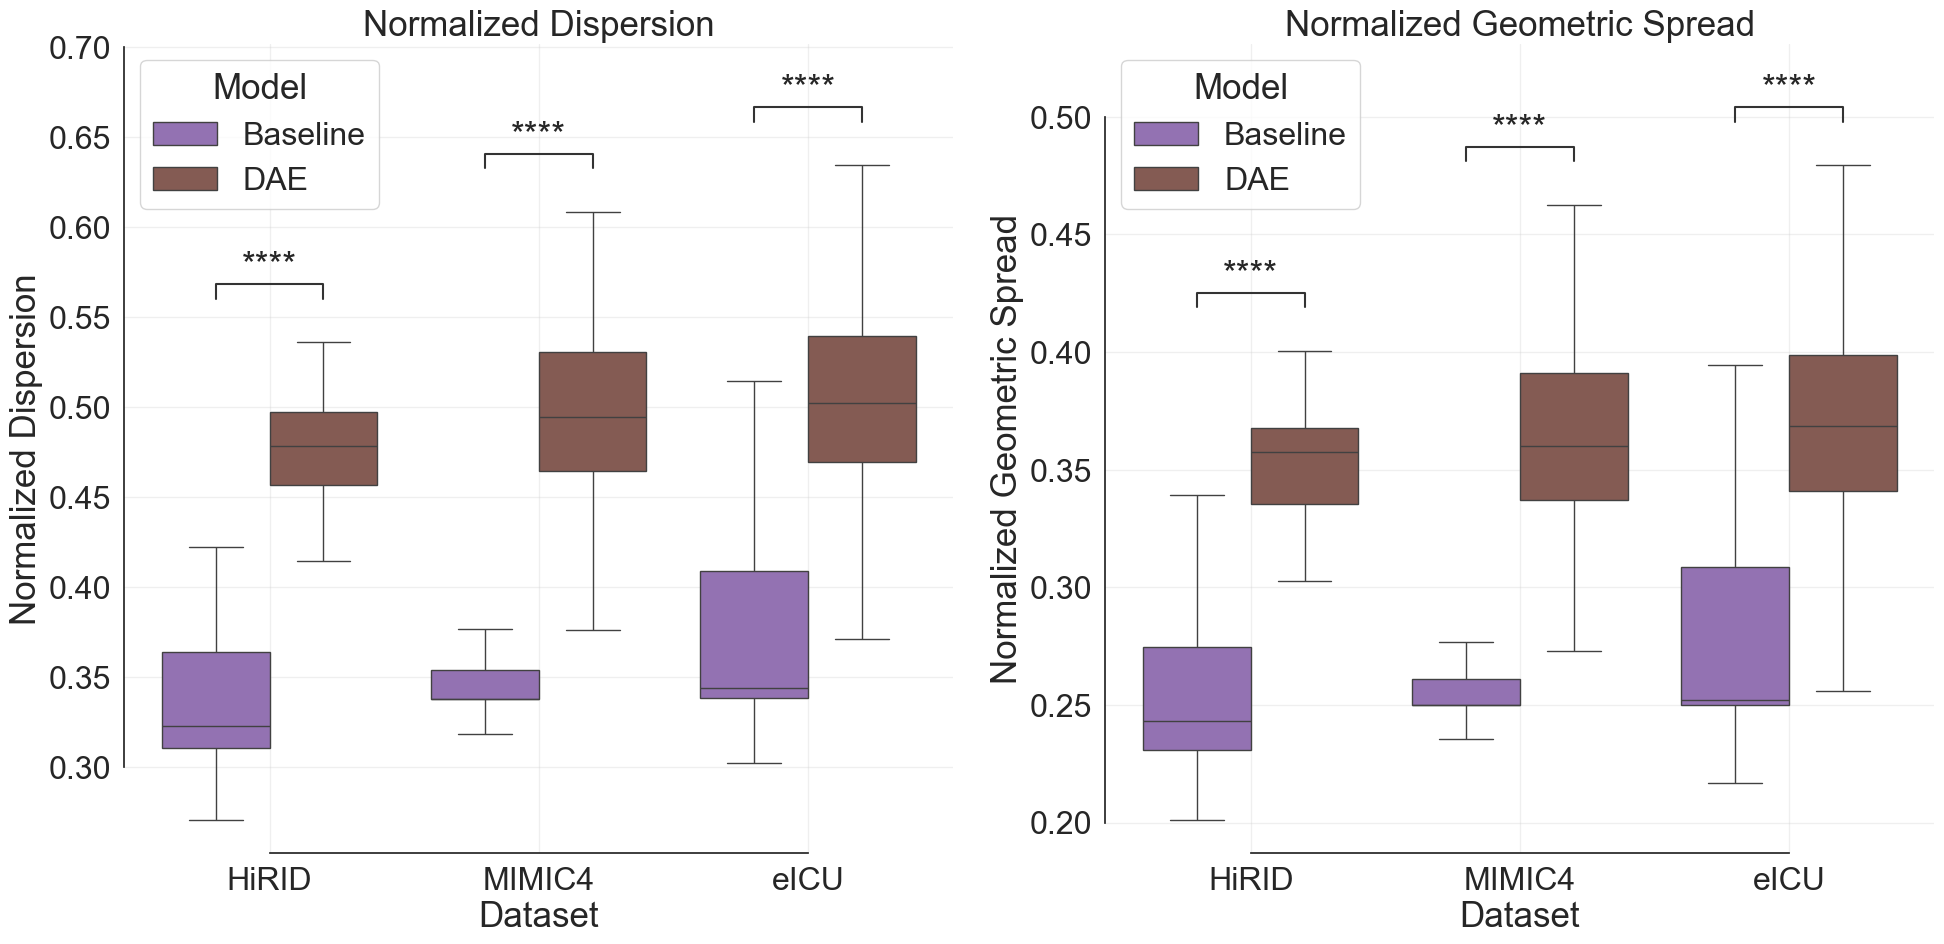

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

sns.set(font_scale=2.1, style='white')

# Initialize the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# ---- First Box Plot ----
sns.boxplot(ax=axes[0], **hue_plot_params_disp, showfliers=False)

# Add statistical annotations
annotator = Annotator(axes[0], pairs, **hue_plot_params_disp, verbose=False)
annotator.configure(
    test="Mann-Whitney",
    correction_format="replace"
).apply_and_annotate()

# Customize the first plot
axes[0].grid(alpha=0.3)
axes[0].set_title('Normalized Dispersion')  # Adjust the title if necessary
sns.despine(ax=axes[0], trim=True)

# ---- Second Box Plot ----
sns.boxplot(ax=axes[1], **hue_plot_params_gs, showfliers=False)

# Add statistical annotations
annotator = Annotator(axes[1], pairs, **hue_plot_params_gs, verbose=False)
annotator.configure(
    test="Mann-Whitney",
    correction_format="replace"
).apply_and_annotate()

# Customize the second plot
axes[1].grid(alpha=0.3)
axes[1].set_title('Normalized Geometric Spread')  # Adjust the title if necessary
sns.despine(ax=axes[1], trim=True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plots
plt.show()


# For external validation graphs -- not shown in manuscript

## Dispersion

In [205]:
values_disp = [21.54,21.86,21.74,21.67,21.49,21.39,21.75,22.56,22.39,21.47,21.94,22.22,22.10,21.95,22.01,21.40,22.91,21.52,21.91,22.78,21.33,25.21,25.69,21.47,21.33,21.33,21.33,21.33,21.33,21.33,21.69,21.33,21.33,21.88,22.70,21.90,21.77,23.87,21.74,22.08,23.06,22.19,21.48,22.08,24.19,22.45,21.33,21.33,21.33,21.51,21.33,26.63,23.30,23.23,22.52,21.36,21.18,21.33,21.37,21.33,21.45,21.33,21.88,21.06,22.33,21.60,21.37,21.60,21.33,22.52,22.57,21.63,21.67,21.52,20.78,21.33,25.90,23.53,21.54,22.10,21.33,25.18,19.82,21.30,21.37,21.34,21.94,21.33,23.49,21.75,22.37,26.56,24.66,21.33,21.45,21.33,21.50,21.33,21.33,21.31,31.15,23.92,25.39,21.59,21.33,21.33,24.33,21.33,21.38,27.21,21.33,21.33,31.94,33.66,31.06,21.33,20.48,22.17,23.30,25.68,26.38,21.33,21.37,21.33,21.20,25.39,20.40,24.28,21.26,28.01,35.31,23.15,22.11,24.57,21.33,31.75,35.75,20.34,23.45,22.37,22.71,21.33,22.12,22.02,21.33,24.41,27.14,23.89,21.56,22.17,22.54,21.33,21.91,23.56,21.31,22.08,21.88,22.60,22.85,23.60,25.45,21.33,21.33,21.25,27.14,30.40,24.73,19.25,21.43,22.00,21.33,21.33,21.43,21.88,21.92,25.36,23.29,21.46,21.90,23.85,21.33,21.34,21.33,22.19,21.58,22.42,23.23,21.33,21.33,21.80,22.38,22.65,21.33,20.98,21.51,21.50,21.33,22.17,21.33,21.33,21.33,21.59,21.33,20.60,26.80,21.34,25.06,23.43,22.77,23.46,21.33,20.71,21.83,23.30,22.23,24.51,21.33,21.33,21.42,23.33,21.34,22.30,21.26,21.33,21.65,21.33,21.74,21.56,21.33,21.55,25.64,21.36,24.18,21.35,21.33,21.33,25.50,21.33,24.27,22.14,24.43,21.33,22.53,21.33,23.84,21.36,21.31,21.33,21.53,23.15,22.08,25.15,21.37,21.33,24.48,21.33,21.87,29.08,21.37,21.33,19.83,21.74,22.55,21.33,23.69,24.11,21.35,21.74,25.97,21.34,29.66,21.34,25.70,21.33,28.38,21.80,29.53,24.85,28.22,21.34,29.05,21.34,28.19,30.95,26.41,21.69,21.36,21.33,21.33,21.33,22.02,23.38,22.20,21.37,21.33,22.24,21.33,21.33,22.71,21.54,21.76,21.33,28.14,21.65,24.09,21.42,22.88,21.33,23.65,22.51,21.33,23.79,21.42,21.47,21.47,20.83,26.88,23.63,21.33,23.32,24.38,22.33,21.92,21.33,29.08,25.21,21.62,20.76,22.50,21.74,21.55,21.33,22.63,24.34,21.37,22.35,21.20,25.66,21.33,22.39,21.33,28.64,22.49,21.72,21.88,22.75,22.81,21.30,21.33,21.31,21.33,25.55,22.69,23.17,21.88,21.33,25.97,27.14,22.51,30.73,
               32.46,28.04,29.69,34.27,28.39,35.22,30.78,32.43,33.24,31.76,31.17,35.57,29.95,29.67,24.80,34.24,31.88,33.24,27.63,32.83,30.33,28.91,32.22,28.37,31.22,36.10,34.22,31.15,34.17,32.36,34.82,36.98,30.46,35.83,34.52,26.76,36.53,30.10,35.61,30.15,34.00,35.33,25.69,31.10,31.46,30.77,33.22,22.61,31.01,29.59,31.01,34.35,33.90,32.38,32.42,28.39,27.99,26.85,39.97,28.12,28.64,28.96,33.94,31.45,25.87,28.67,34.29,29.43,36.52,33.58,32.41,26.41,35.04,31.78,31.05,37.75,27.68,36.04,31.15,34.97,33.99,36.20,31.66,32.88,39.45,32.32,29.20,32.02,26.51,28.98,32.77,34.36,31.57,35.60,35.60,31.49,26.22,30.81,33.91,29.94,27.24,33.46,36.44,30.05,33.19,28.40,35.04,33.77,31.71,33.79,34.55,30.27,29.75,25.78,34.42,30.26,29.45,34.87,23.73,33.51,29.56,32.38,25.96,33.20,25.82,29.56,34.46,33.37,33.12,28.16,34.64,33.52,31.09,38.22,31.02,32.36,32.91,24.95,34.02,32.73,29.34,34.51,36.04,36.64,32.98,28.09,31.31,34.01,29.88,31.58,29.73,29.87,33.84,33.22,34.78,29.17,28.20,27.61,30.75,32.00,25.90,31.61,23.37,28.48,32.55,33.03,36.57,29.38,29.47,29.92,30.83,32.30,28.60,27.03,31.08,33.99,34.10,31.18,33.83,36.33,35.06,35.20,32.42,34.28,27.67,29.93,29.25,33.46,35.39,30.81,32.50,32.43,25.76,33.00,33.51,27.05,34.59,34.71,38.10,27.42,35.29,28.47,36.45,31.51,35.23,30.51,30.87,33.91,34.49,34.68,30.71,33.96,30.78,34.73,33.35,30.09,37.44,33.22,38.62,31.66,35.45,31.63,32.76,34.18,34.76,24.94,29.18,31.44,28.59,27.91,32.11,32.95,35.06,29.05,35.24,30.77,29.64,33.71,28.89,31.88,37.60,33.91,28.85,31.41,31.62,23.44,30.62,30.13,32.41,34.36,30.38,32.46,37.66,30.51,34.89,34.00,28.95,29.69,25.04,29.15,31.80,30.73,37.53,31.93,31.24,29.08,33.00,29.22,31.22,35.55,32.76,31.52,31.54,31.47,33.65,34.83,36.05,31.61,30.74,31.60,31.78,30.44,31.68,30.13,26.23,25.91,34.52,26.78,29.20,31.01,34.76,30.06,29.91,36.75,32.63,32.53,37.01,29.41,32.48,35.33,33.68,33.73,35.60,30.93,30.02,26.54,35.81,32.12,34.91,29.88,29.04,35.50,28.81,29.43,26.16,29.14,31.30,30.68,25.39,32.46,31.16,33.51,28.29,26.91,32.44,31.45,31.60,32.46,29.00,29.20,29.70,30.75,25.74,32.95,29.54,23.43,35.08,35.13,31.30,30.39,35.36,34.24,30.33,35.10,31.57,33.69,33.26,32.11,34.34,25.59,28.84,32.07,33.15,24.12,29.62,29.64,29.00,31.65,26.35,31.66,
               29.092,30.721,32.073,28.493,30.027,21.722,29.512,24.266,29.758,21.390,22.435,34.554,36.025,30.079,39.281,28.558,28.964,31.425,24.221,26.778,25.319,34.892,31.344,23.962,18.632,21.767,19.307,31.309,28.275,26.334,33.724,23.772,24.131,31.478,34.909,23.117,18.038,33.491,21.099,21.083,23.523,24.135,27.052,31.591,21.600,27.324,33.194,27.594,23.871,36.612,24.019,31.288,24.425,26.581,35.235,32.287,26.946,29.349,22.609,25.760,33.039,31.341,22.651,36.964,37.178,24.149,35.982,33.273,34.799,31.939,31.611,28.934,23.576,30.641,26.314,21.335,22.558,22.345,21.593,21.693,21.791,21.885,21.976,21.713,21.527,21.627,21.726,21.823,21.916,22.005,21.864,21.715,23.873,21.866,21.629,22.000,21.643,21.493,22.079,21.744,21.385,22.057,21.751,21.537,21.911,22.293,21.023,22.086,27.390,21.696,25.276,22.100,21.746,33.629,21.806,21.751,31.366,21.844,21.888,27.948,21.764,21.498,22.009,21.706,21.686,22.217,21.483,21.613,22.274,21.547,21.244,22.115,21.696,21.595,22.104,21.746,21.737,21.335,21.335,22.473,22.191,21.859,21.335,21.969,24.874,24.861,40.358,21.544,21.720,24.771,21.726,22.566,21.335,21.211,20.671,39.545,35.451,32.427,25.952,31.523,31.161,30.820,34.268,33.431,27.062,33.211,22.453,23.154,21.335,21.335,21.335,25.817,21.335,21.335,21.335,21.335,21.366,21.335,21.335,24.518,21.335,21.338,29.119,33.232,34.147,32.492,32.435,30.036,25.563,29.505,29.015,31.520,21.852,21.774,21.335,21.335,21.335,21.335,21.335,22.473,21.335,27.569,21.335,21.335,22.743,21.335,21.335,27.599,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,5.696,21.260,21.335,22.729,21.033,21.335,21.335,22.573,21.089,21.335,21.704,24.244,21.335,22.142,11.815,21.335,21.335,6.181,22.571,21.366,21.335,21.335,21.335,21.335,21.879,21.516,21.335,21.335,21.276,21.927,24.576,29.125,26.527,29.469,27.527,24.971,27.655,28.162,23.273,21.369,28.131,21.335,25.004,33.970,21.413,27.510,31.116,28.488,28.387,30.025,16.160,38.558,24.544,27.090,36.887,30.518,26.823,19.190,21.335,21.335,21.335,21.335,21.338,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,8.773,11.020,24.632,27.365,25.647,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.335,21.553,21.335,21.335,21.335,22.581,21.335,21.335,21.335,21.335,21.366,21.542,21.335,21.335,21.335,21.335,21.437,21.335,21.335,21.335,
               32.464,28.042,29.691,34.271,28.393,35.222,30.782,32.425,33.237,31.756,31.168,35.568,29.952,29.672,24.796,34.245,31.878,33.242,27.635,32.829,30.328,28.911,32.217,28.374,31.224,36.102,34.224,31.151,34.174,32.359,34.819,36.977,30.463,35.834,34.517,26.756,36.531,30.101,35.614,30.148,33.998,35.331,25.688,31.099,31.458,30.766,33.224,22.606,31.010,29.593,31.006,34.351,33.900,32.378,32.422,28.393,27.990,26.855,39.974,28.117,28.642,28.958,33.943,31.449,25.875,28.665,34.286,29.426,36.525,33.578,32.411,26.414,35.042,31.783,31.051,37.749,27.677,36.038,31.153,34.968,33.992,36.203,31.657,32.884,39.451,32.324,29.198,32.021,26.509,28.980,32.765,34.364,31.567,35.598,35.597,31.493,26.225,30.811,33.908,29.945,27.238,33.462,36.439,30.050,33.189,28.401,35.043,33.773,31.711,33.795,34.548,30.269,29.749,25.778,34.417,30.256,29.449,34.871,23.734,33.505,29.562,32.376,25.959,33.203,25.822,29.557,34.455,33.372,33.115,28.156,34.635,33.524,31.087,38.216,31.023,32.362,32.908,24.951,34.017,32.732,29.345,34.505,36.043,36.636,32.984,28.085,31.312,34.010,29.882,31.576,29.731,29.868,33.841,33.219,34.783,29.166,28.202,27.611,30.746,32.000,25.895,31.615,23.374,28.476,32.551,33.033,36.570,29.378,29.473,29.915,30.832,32.297,28.605,27.032,31.083,33.991,34.105,31.178,33.829,36.334,35.060,35.196,32.419,34.280,27.674,29.926,29.247,33.458,35.393,30.813,32.501,32.427,25.755,32.999,33.514,27.049,34.595,34.715,38.102,27.423,35.286,28.466,36.446,31.513,35.233,30.515,30.870,33.911,34.486,34.677,30.707,33.964,30.776,34.734,33.346,30.090,37.441,33.218,38.624,31.663,35.448,31.632,32.761,34.182,34.758,24.937,29.181,31.444,28.587,27.910,32.113,32.949,35.062,29.051,35.240,30.771,29.637,33.707,28.886,31.876,37.603,33.907,28.849,31.407,31.623,23.439,30.619,30.135,32.415,34.362,30.375,32.462,37.658,30.507,34.888,33.999,28.947,29.687,25.042,29.151,31.802,30.726,37.529,31.931,31.236,29.079,33.001,29.218,31.217,35.553,32.764,31.524,31.540,31.475,33.653,34.828,36.054,31.612,30.740,31.597,31.775,30.441,31.678,30.127,26.234,25.907,34.525,26.776,29.204,31.009,34.764,30.057,29.911,36.753,32.634,32.532,37.011,29.405,32.484,35.334,33.681,33.734,35.602,30.927,30.025,26.541,35.806,32.119,34.910,29.882,29.040,35.504,28.807,29.431,26.156,29.135,31.300,30.682,25.390,32.461,31.161,33.507,28.290,26.908,32.440,31.447,31.603,32.456,28.998,29.200,29.701,30.745,25.738,32.954,29.543,23.433,35.076,35.129,31.303,30.388,35.355,34.238,30.326,35.104,31.566,33.694,33.256,32.108,34.339,25.592,28.839,32.069,33.145,24.117,29.623,29.640,29.001,31.651,26.348,31.657]

In [206]:
values_disp_norm = [0.3419, 0.347, 0.3451, 0.344, 0.3411, 0.3395, 0.3452, 0.3581, 0.3554, 0.3408, 0.3483, 0.3527, 0.3508, 0.3484, 0.3494, 0.3397, 0.3637, 0.3416, 0.3478, 0.3616, 0.3386, 0.4002, 0.4078, 0.3408, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3386, 0.3443, 0.3386, 0.3386, 0.3473, 0.3603, 0.3476, 0.3456, 0.3789, 0.3451, 0.3505, 0.366, 0.3522, 0.341, 0.3505, 0.384, 0.3563, 0.3386, 0.3386, 0.3386, 0.3414, 0.3386, 0.4227, 0.3698, 0.3687, 0.3575, 0.339, 0.3362, 0.3386, 0.3392, 0.3386, 0.3405, 0.3386, 0.3473, 0.3343, 0.3544, 0.3429, 0.3392, 0.3429, 0.3386, 0.3575, 0.3583, 0.3433, 0.344, 0.3416, 0.3298, 0.3386, 0.4111, 0.3735, 0.3419, 0.3508, 0.3386, 0.3997, 0.3146, 0.3381, 0.3392, 0.3387, 0.3483, 0.3386, 0.3729, 0.3452, 0.3551, 0.4216, 0.3914, 0.3386, 0.3405, 0.3386, 0.3413, 0.3386, 0.3386, 0.3383, 0.4944, 0.3797, 0.403, 0.3427, 0.3386, 0.3386, 0.3862, 0.3386, 0.3394, 0.4319, 0.3386, 0.3386, 0.507, 0.5343, 0.493, 0.3386, 0.3251, 0.3519, 0.3698, 0.4076, 0.4187, 0.3386, 0.3392, 0.3386, 0.3365, 0.403, 0.3238, 0.3854, 0.3375, 0.4446, 0.5605, 0.3675, 0.351, 0.39, 0.3386, 0.504, 0.5675, 0.3229, 0.3722, 0.3551, 0.3605, 0.3386, 0.3511, 0.3495, 0.3386, 0.3875, 0.4308, 0.3792, 0.3422, 0.3519, 0.3578, 0.3386, 0.3478, 0.374, 0.3383, 0.3505, 0.3473, 0.3587, 0.3627, 0.3746, 0.404, 0.3386, 0.3386, 0.3373, 0.4308, 0.4825, 0.3925, 0.3056, 0.3402, 0.3492, 0.3386, 0.3386, 0.3402, 0.3473, 0.3479, 0.4025, 0.3697, 0.3406, 0.3476, 0.3786, 0.3386, 0.3387, 0.3386, 0.3522, 0.3425, 0.3559, 0.3687, 0.3386, 0.3386, 0.346, 0.3552, 0.3595, 0.3386, 0.333, 0.3414, 0.3413, 0.3386, 0.3519, 0.3386, 0.3386, 0.3386, 0.3427, 0.3386, 0.327, 0.4254, 0.3387, 0.3978, 0.3719, 0.3614, 0.3724, 0.3386, 0.3287, 0.3465, 0.3698, 0.3529, 0.389, 0.3386, 0.3386, 0.34, 0.3703, 0.3387, 0.354, 0.3375, 0.3386, 0.3437, 0.3386, 0.3451, 0.3422, 0.3386, 0.3421, 0.407, 0.339, 0.3838, 0.3389, 0.3386, 0.3386, 0.4048, 0.3386, 0.3852, 0.3514, 0.3878, 0.3386, 0.3576, 0.3386, 0.3784, 0.339, 0.3383, 0.3386, 0.3417, 0.3675, 0.3505, 0.3992, 0.3392, 0.3386, 0.3886, 0.3386, 0.3471, 0.4616, 0.3392, 0.3386, 0.3148, 0.3451, 0.3579, 0.3386, 0.376, 0.3827, 0.3389, 0.3451, 0.4122, 0.3387, 0.4708, 0.3387, 0.4079, 0.3386, 0.4505, 0.346, 0.4687, 0.3944, 0.4479, 0.3387, 0.4611, 0.3387, 0.4475, 0.4913, 0.4192, 0.3443, 0.339, 0.3386, 0.3386, 0.3386, 0.3495, 0.3711, 0.3524, 0.3392, 0.3386, 0.353, 0.3386, 0.3386, 0.3605, 0.3419, 0.3454, 0.3386, 0.4467, 0.3437, 0.3824, 0.34, 0.3632, 0.3386, 0.3754, 0.3573, 0.3386, 0.3776, 0.34, 0.3408, 0.3408, 0.3306, 0.4267, 0.3751, 0.3386, 0.3702, 0.387, 0.3544, 0.3479, 0.3386, 0.4616, 0.4002, 0.3432, 0.3295, 0.3571, 0.3451, 0.3421, 0.3386, 0.3592, 0.3863, 0.3392, 0.3548, 0.3365, 0.4073, 0.3386, 0.3554, 0.3386, 0.4546, 0.357, 0.3448, 0.3473, 0.3611, 0.3621, 0.3381, 0.3386, 0.3383, 0.3386, 0.4056, 0.3602, 0.3678, 0.3473, 0.3386, 0.4122, 0.4308, 0.3573, 0.4878,
                    0.5152, 0.4451, 0.4713, 0.544, 0.4506, 0.559, 0.4886, 0.5148, 0.5276, 0.5041, 0.4948, 0.5646, 0.4754, 0.471, 0.3937, 0.5435, 0.506, 0.5276, 0.4386, 0.5211, 0.4814, 0.4589, 0.5114, 0.4503, 0.4956, 0.573, 0.5432, 0.4944, 0.5424, 0.5137, 0.5527, 0.587, 0.4835, 0.5687, 0.5479, 0.4248, 0.5798, 0.4778, 0.5652, 0.4786, 0.5397, 0.5608, 0.4078, 0.4937, 0.4994, 0.4884, 0.5273, 0.3589, 0.4922, 0.4697, 0.4922, 0.5452, 0.5381, 0.514, 0.5146, 0.4506, 0.4443, 0.4262, 0.6344, 0.4463, 0.4546, 0.4597, 0.5387, 0.4992, 0.4106, 0.4551, 0.5443, 0.4671, 0.5797, 0.533, 0.5144, 0.4192, 0.5562, 0.5044, 0.4929, 0.5992, 0.4394, 0.5721, 0.4944, 0.5551, 0.5395, 0.5746, 0.5025, 0.5219, 0.6262, 0.513, 0.4635, 0.5083, 0.4208, 0.46, 0.5202, 0.5454, 0.5011, 0.5651, 0.5651, 0.4998, 0.4162, 0.489, 0.5383, 0.4752, 0.4324, 0.5311, 0.5784, 0.477, 0.5268, 0.4508, 0.5562, 0.536, 0.5033, 0.5363, 0.5484, 0.4805, 0.4722, 0.4092, 0.5463, 0.4803, 0.4675, 0.5535, 0.3767, 0.5319, 0.4692, 0.514, 0.4121, 0.527, 0.4098, 0.4692, 0.547, 0.5297, 0.5257, 0.447, 0.5498, 0.5321, 0.4935, 0.6067, 0.4924, 0.5137, 0.5224, 0.396, 0.54, 0.5195, 0.4657, 0.5478, 0.5721, 0.5816, 0.5235, 0.4459, 0.497, 0.5398, 0.4743, 0.5013, 0.4719, 0.4741, 0.5371, 0.5273, 0.5521, 0.463, 0.4476, 0.4383, 0.4881, 0.5079, 0.4111, 0.5017, 0.371, 0.4521, 0.5167, 0.5243, 0.5805, 0.4663, 0.4678, 0.4749, 0.4894, 0.5127, 0.454, 0.429, 0.4933, 0.5395, 0.5413, 0.4949, 0.537, 0.5767, 0.5565, 0.5587, 0.5146, 0.5441, 0.4392, 0.4751, 0.4643, 0.5311, 0.5617, 0.489, 0.5159, 0.5148, 0.4089, 0.5238, 0.5319, 0.4294, 0.549, 0.551, 0.6048, 0.4352, 0.5602, 0.4519, 0.5786, 0.5002, 0.5592, 0.4843, 0.49, 0.5383, 0.5475, 0.5505, 0.4875, 0.539, 0.4886, 0.5513, 0.5294, 0.4776, 0.5943, 0.5273, 0.613, 0.5025, 0.5627, 0.5021, 0.52, 0.5425, 0.5517, 0.3959, 0.4632, 0.499, 0.4538, 0.443, 0.5097, 0.523, 0.5565, 0.4611, 0.5594, 0.4884, 0.4705, 0.5351, 0.4586, 0.506, 0.5968, 0.5383, 0.4579, 0.4986, 0.5019, 0.3721, 0.486, 0.4783, 0.5144, 0.5454, 0.4822, 0.5152, 0.5978, 0.4843, 0.5538, 0.5397, 0.4595, 0.4713, 0.3975, 0.4627, 0.5048, 0.4878, 0.5957, 0.5068, 0.4959, 0.4616, 0.5238, 0.4638, 0.4956, 0.5643, 0.52, 0.5003, 0.5006, 0.4995, 0.5341, 0.5529, 0.5722, 0.5017, 0.4879, 0.5016, 0.5044, 0.4832, 0.5029, 0.4783, 0.4163, 0.4113, 0.5479, 0.4251, 0.4635, 0.4922, 0.5517, 0.4771, 0.4748, 0.5833, 0.5179, 0.5163, 0.5875, 0.4668, 0.5156, 0.5608, 0.5346, 0.5354, 0.5651, 0.491, 0.4765, 0.4213, 0.5684, 0.5098, 0.5541, 0.4743, 0.461, 0.5635, 0.4573, 0.4671, 0.4152, 0.4625, 0.4968, 0.487, 0.403, 0.5152, 0.4946, 0.5319, 0.449, 0.4271, 0.5149, 0.4992, 0.5016, 0.5152, 0.4603, 0.4635, 0.4714, 0.4881, 0.4086, 0.523, 0.4689, 0.3719, 0.5568, 0.5576, 0.4968, 0.4824, 0.5613, 0.5435, 0.4814, 0.5571, 0.5011, 0.5348, 0.5279, 0.5097, 0.5451, 0.4062, 0.4578, 0.509, 0.5262, 0.3829, 0.4702, 0.4705, 0.4603, 0.5024, 0.4183, 0.5025,
                    0.4618, 0.4876, 0.5091, 0.4523, 0.4766, 0.3448, 0.4684, 0.3852, 0.4723, 0.3395, 0.3561, 0.5485, 0.5718, 0.4774, 0.6235, 0.4533, 0.4597, 0.4988, 0.3845, 0.425, 0.4019, 0.5538, 0.4975, 0.3803, 0.2957, 0.3455, 0.3065, 0.497, 0.4488, 0.418, 0.5353, 0.3773, 0.383, 0.4997, 0.5541, 0.3669, 0.2863, 0.5316, 0.3349, 0.3347, 0.3734, 0.3831, 0.4294, 0.5014, 0.3429, 0.4337, 0.5269, 0.438, 0.3789, 0.5811, 0.3813, 0.4966, 0.3877, 0.4219, 0.5593, 0.5125, 0.4277, 0.4659, 0.3589, 0.4089, 0.5244, 0.4975, 0.3595, 0.5867, 0.5901, 0.3833, 0.5711, 0.5281, 0.5524, 0.507, 0.5018, 0.4593, 0.3742, 0.4864, 0.4177, 0.3387, 0.3581, 0.3547, 0.3427, 0.3443, 0.3459, 0.3474, 0.3488, 0.3447, 0.3417, 0.3433, 0.3449, 0.3464, 0.3479, 0.3493, 0.347, 0.3447, 0.3789, 0.3471, 0.3433, 0.3492, 0.3435, 0.3412, 0.3505, 0.3451, 0.3394, 0.3501, 0.3453, 0.3419, 0.3478, 0.3539, 0.3337, 0.3506, 0.4348, 0.3444, 0.4012, 0.3508, 0.3452, 0.5338, 0.3461, 0.3453, 0.4979, 0.3467, 0.3474, 0.4436, 0.3455, 0.3412, 0.3493, 0.3445, 0.3442, 0.3527, 0.341, 0.3431, 0.3536, 0.342, 0.3372, 0.351, 0.3444, 0.3428, 0.3509, 0.3452, 0.345, 0.3387, 0.3387, 0.3567, 0.3522, 0.347, 0.3387, 0.3487, 0.3948, 0.3946, 0.6406, 0.342, 0.3448, 0.3932, 0.3449, 0.3582, 0.3387, 0.3367, 0.3281, 0.6277, 0.5627, 0.5147, 0.4119, 0.5004, 0.4946, 0.4892, 0.5439, 0.5307, 0.4296, 0.5272, 0.3564, 0.3675, 0.3387, 0.3387, 0.3387, 0.4098, 0.3387, 0.3387, 0.3387, 0.3387, 0.3391, 0.3387, 0.3387, 0.3892, 0.3387, 0.3387, 0.4622, 0.5275, 0.542, 0.5157, 0.5148, 0.4768, 0.4058, 0.4683, 0.4606, 0.5003, 0.3469, 0.3456, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3567, 0.3387, 0.4376, 0.3387, 0.3387, 0.361, 0.3387, 0.3387, 0.4381, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.0904, 0.3375, 0.3387, 0.3608, 0.3339, 0.3387, 0.3387, 0.3583, 0.3347, 0.3387, 0.3445, 0.3848, 0.3387, 0.3515, 0.1875, 0.3387, 0.3387, 0.0981, 0.3583, 0.3391, 0.3387, 0.3387, 0.3387, 0.3387, 0.3473, 0.3415, 0.3387, 0.3387, 0.3377, 0.348, 0.3901, 0.4623, 0.4211, 0.4678, 0.4369, 0.3964, 0.439, 0.447, 0.3694, 0.3392, 0.4465, 0.3387, 0.3969, 0.5392, 0.3399, 0.4367, 0.4939, 0.4522, 0.4506, 0.4766, 0.2565, 0.612, 0.3896, 0.43, 0.5855, 0.4844, 0.4258, 0.3046, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.1393, 0.1749, 0.391, 0.4344, 0.4071, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3387, 0.3421, 0.3387, 0.3387, 0.3387, 0.3584, 0.3387, 0.3387, 0.3387, 0.3387, 0.3391, 0.3419, 0.3387, 0.3387, 0.3387, 0.3387, 0.3403, 0.3387, 0.3387, 0.3387,
                    0.5153, 0.4451, 0.4713, 0.544, 0.4507, 0.5591, 0.4886, 0.5147, 0.5276, 0.5041, 0.4947, 0.5646, 0.4754, 0.471, 0.3936, 0.5436, 0.506, 0.5277, 0.4387, 0.5211, 0.4814, 0.4589, 0.5114, 0.4504, 0.4956, 0.573, 0.5432, 0.4945, 0.5424, 0.5136, 0.5527, 0.5869, 0.4835, 0.5688, 0.5479, 0.4247, 0.5799, 0.4778, 0.5653, 0.4785, 0.5397, 0.5608, 0.4077, 0.4936, 0.4993, 0.4883, 0.5274, 0.3588, 0.4922, 0.4697, 0.4922, 0.5453, 0.5381, 0.5139, 0.5146, 0.4507, 0.4443, 0.4263, 0.6345, 0.4463, 0.4546, 0.4597, 0.5388, 0.4992, 0.4107, 0.455, 0.5442, 0.4671, 0.5798, 0.533, 0.5145, 0.4193, 0.5562, 0.5045, 0.4929, 0.5992, 0.4393, 0.572, 0.4945, 0.555, 0.5396, 0.5747, 0.5025, 0.522, 0.6262, 0.5131, 0.4635, 0.5083, 0.4208, 0.46, 0.5201, 0.5455, 0.5011, 0.565, 0.565, 0.4999, 0.4163, 0.4891, 0.5382, 0.4753, 0.4323, 0.5311, 0.5784, 0.477, 0.5268, 0.4508, 0.5562, 0.5361, 0.5033, 0.5364, 0.5484, 0.4805, 0.4722, 0.4092, 0.5463, 0.4803, 0.4674, 0.5535, 0.3767, 0.5318, 0.4692, 0.5139, 0.412, 0.527, 0.4099, 0.4692, 0.5469, 0.5297, 0.5256, 0.4469, 0.5498, 0.5321, 0.4934, 0.6066, 0.4924, 0.5137, 0.5223, 0.396, 0.54, 0.5196, 0.4658, 0.5477, 0.5721, 0.5815, 0.5236, 0.4458, 0.497, 0.5398, 0.4743, 0.5012, 0.4719, 0.4741, 0.5372, 0.5273, 0.5521, 0.463, 0.4477, 0.4383, 0.488, 0.5079, 0.411, 0.5018, 0.371, 0.452, 0.5167, 0.5243, 0.5805, 0.4663, 0.4678, 0.4748, 0.4894, 0.5127, 0.454, 0.4291, 0.4934, 0.5395, 0.5413, 0.4949, 0.537, 0.5767, 0.5565, 0.5587, 0.5146, 0.5441, 0.4393, 0.475, 0.4642, 0.5311, 0.5618, 0.4891, 0.5159, 0.5147, 0.4088, 0.5238, 0.532, 0.4293, 0.5491, 0.551, 0.6048, 0.4353, 0.5601, 0.4518, 0.5785, 0.5002, 0.5593, 0.4844, 0.49, 0.5383, 0.5474, 0.5504, 0.4874, 0.5391, 0.4885, 0.5513, 0.5293, 0.4776, 0.5943, 0.5273, 0.6131, 0.5026, 0.5627, 0.5021, 0.52, 0.5426, 0.5517, 0.3958, 0.4632, 0.4991, 0.4538, 0.443, 0.5097, 0.523, 0.5565, 0.4611, 0.5594, 0.4884, 0.4704, 0.535, 0.4585, 0.506, 0.5969, 0.5382, 0.4579, 0.4985, 0.502, 0.372, 0.486, 0.4783, 0.5145, 0.5454, 0.4821, 0.5153, 0.5977, 0.4842, 0.5538, 0.5397, 0.4595, 0.4712, 0.3975, 0.4627, 0.5048, 0.4877, 0.5957, 0.5068, 0.4958, 0.4616, 0.5238, 0.4638, 0.4955, 0.5643, 0.5201, 0.5004, 0.5006, 0.4996, 0.5342, 0.5528, 0.5723, 0.5018, 0.4879, 0.5015, 0.5044, 0.4832, 0.5028, 0.4782, 0.4164, 0.4112, 0.548, 0.425, 0.4636, 0.4922, 0.5518, 0.4771, 0.4748, 0.5834, 0.518, 0.5164, 0.5875, 0.4667, 0.5156, 0.5609, 0.5346, 0.5355, 0.5651, 0.4909, 0.4766, 0.4213, 0.5683, 0.5098, 0.5541, 0.4743, 0.461, 0.5636, 0.4573, 0.4672, 0.4152, 0.4625, 0.4968, 0.487, 0.403, 0.5153, 0.4946, 0.5319, 0.449, 0.4271, 0.5149, 0.4992, 0.5016, 0.5152, 0.4603, 0.4635, 0.4714, 0.488, 0.4085, 0.5231, 0.4689, 0.372, 0.5568, 0.5576, 0.4969, 0.4823, 0.5612, 0.5435, 0.4814, 0.5572, 0.501, 0.5348, 0.5279, 0.5097, 0.5451, 0.4062, 0.4578, 0.509, 0.5261, 0.3828, 0.4702, 0.4705, 0.4603, 0.5024, 0.4182, 0.5025]

## GEOMETRIC SPREAD

In [207]:
values_gs = [15.80,15.99,16.13,16.01,15.86,15.78,16.05,16.39,16.29,15.83,16.25,16.37,16.13,16.13,15.99,15.78,16.60,15.86,16.06,16.52,15.75,18.25,18.59,15.83,15.70,15.75,15.75,15.75,15.75,15.75,16.06,15.75,15.75,15.98,16.47,16.01,16.14,17.33,15.95,16.16,16.70,16.53,15.82,16.45,17.56,16.33,15.75,15.75,15.75,15.93,15.75,19.42,16.83,16.79,16.38,15.76,15.56,15.75,15.76,15.75,15.79,15.75,15.90,15.53,16.33,15.93,15.76,16.07,15.75,16.45,16.40,15.84,15.88,15.86,15.28,15.75,19.10,16.97,15.91,16.17,15.75,18.16,14.49,15.65,15.76,15.75,16.05,15.75,17.08,15.99,16.35,19.58,17.77,15.75,15.81,15.75,15.91,15.75,15.75,15.73,23.74,17.52,18.37,15.89,15.75,15.75,17.70,15.75,15.77,19.91,15.75,15.75,25.29,26.62,23.66,15.75,15.07,16.16,16.85,18.61,19.24,15.75,15.77,15.75,15.55,18.28,15.03,17.67,15.73,21.27,28.16,17.01,16.27,18.43,15.75,24.89,26.41,14.42,17.02,16.74,16.57,15.75,16.14,16.39,15.75,17.75,19.67,17.23,15.93,16.16,16.88,15.75,16.19,17.27,15.73,16.10,16.25,17.05,16.61,17.18,18.58,15.75,15.75,15.62,20.11,22.91,18.02,14.01,15.78,16.14,15.75,15.75,15.78,16.08,16.04,18.47,16.87,15.85,16.06,17.19,15.75,15.75,15.75,16.36,15.88,16.42,16.82,15.75,15.75,16.15,16.30,16.55,15.75,15.38,15.79,15.81,15.75,16.56,15.75,15.75,15.75,15.93,15.75,15.04,19.41,15.75,18.07,17.21,16.54,17.10,15.75,15.21,15.99,16.92,16.20,17.83,15.75,15.75,15.80,16.85,15.75,16.65,15.60,15.75,16.05,15.75,16.13,15.89,15.75,15.82,18.61,15.80,17.52,15.66,15.75,15.75,18.52,15.75,17.50,16.24,17.65,15.75,16.46,15.75,17.25,15.76,15.73,15.75,15.89,16.87,16.47,18.15,15.76,15.75,17.73,15.75,16.25,21.64,15.76,15.75,14.53,15.92,16.42,15.75,17.20,17.38,15.75,16.12,18.55,15.75,22.41,15.75,19.13,15.75,20.99,15.84,21.50,18.47,22.03,15.75,21.81,15.75,21.23,23.60,19.25,16.12,15.77,15.75,15.75,15.75,16.08,16.89,16.51,15.76,15.75,16.31,15.75,15.75,16.48,15.87,15.91,15.75,20.98,15.97,17.74,15.80,16.59,15.75,17.08,16.36,15.75,17.15,15.78,15.79,15.83,15.31,19.44,17.24,15.75,16.87,17.54,16.62,15.95,15.75,21.18,18.33,15.92,15.24,16.39,16.12,15.92,15.75,16.98,17.59,15.76,16.57,15.55,18.70,15.75,16.47,15.75,21.04,16.35,15.87,16.18,16.53,16.68,15.64,15.75,15.73,15.75,18.54,17.15,16.78,16.24,15.75,18.99,20.12,16.36,22.81,
               23.96,21.71,21.32,25.66,20.70,26.05,22.77,23.41,24.26,23.12,22.78,26.48,21.59,22.15,17.37,25.43,23.49,24.66,19.84,24.43,22.17,21.27,23.63,20.36,22.57,26.44,25.61,23.10,25.09,23.69,25.53,27.56,22.22,26.62,25.04,19.75,27.06,22.14,26.08,21.71,25.50,26.23,18.48,22.72,23.27,22.57,23.99,15.86,22.91,21.31,22.34,25.54,25.27,23.40,23.29,20.72,20.01,19.17,30.21,21.02,20.23,20.67,25.67,23.06,18.56,20.12,24.97,21.78,26.60,24.99,23.74,18.57,25.84,23.22,22.06,27.97,19.88,27.71,22.44,25.70,24.07,26.75,23.45,23.59,29.37,23.89,21.16,23.36,18.98,21.06,24.15,25.45,23.11,26.54,26.66,23.31,18.55,22.27,25.03,22.10,19.57,23.71,27.54,21.99,24.29,20.89,26.66,24.94,22.90,24.36,25.28,21.85,21.06,18.77,26.28,21.93,21.61,25.83,16.13,24.72,21.28,24.54,18.17,24.59,18.47,21.33,25.36,24.66,23.94,20.38,25.52,24.73,22.99,28.10,22.91,24.60,24.17,17.96,25.46,24.06,21.22,25.79,26.68,27.62,23.89,20.54,23.02,25.37,21.46,22.86,21.78,21.64,24.49,24.77,25.41,21.25,20.60,20.36,22.41,24.03,18.87,23.83,16.80,20.15,24.12,24.22,26.88,21.30,20.93,21.40,22.59,22.92,20.44,19.66,22.78,25.28,25.42,22.20,25.55,27.53,26.32,26.25,23.62,25.56,19.84,22.12,21.37,24.38,26.57,21.92,23.90,24.21,18.11,24.67,24.44,19.62,25.12,25.79,28.35,19.34,25.55,20.71,28.07,22.69,25.92,22.77,22.56,24.72,25.39,25.66,22.15,24.66,22.42,25.33,24.29,21.49,28.34,24.38,28.36,24.02,26.64,22.57,24.34,25.37,25.82,18.37,22.06,23.38,20.53,19.91,23.19,24.75,25.32,21.13,25.86,22.07,21.64,25.12,20.76,23.45,28.15,25.18,20.21,23.25,22.64,17.10,22.19,21.94,23.49,25.60,22.02,23.97,28.53,22.56,25.40,25.16,21.40,21.68,17.82,21.12,23.44,22.43,28.23,23.15,22.49,21.64,24.91,21.02,22.82,26.29,24.37,22.12,23.18,22.70,24.92,25.39,26.36,22.99,22.38,22.90,23.23,21.91,22.82,22.33,18.91,18.40,25.28,19.52,20.96,22.57,25.89,22.10,21.65,27.61,24.04,23.37,27.46,21.37,24.34,26.22,24.18,25.15,26.84,22.02,22.36,18.65,26.15,23.07,25.55,22.06,21.21,26.17,20.85,21.45,18.75,21.73,23.61,22.02,17.67,24.43,23.27,24.57,19.94,19.48,24.51,22.89,23.20,23.77,21.21,21.36,21.51,22.09,18.71,23.85,21.47,16.62,25.80,26.32,22.99,22.70,26.16,25.00,21.43,26.07,23.24,24.72,24.58,22.94,25.61,17.92,21.32,23.84,24.25,16.86,21.67,21.48,21.17,23.77,19.06,23.39,
               21.684,23.025,23.324,21.380,22.693,15.977,20.666,17.416,22.323,15.733,16.358,25.347,27.346,22.538,29.312,20.787,21.516,23.174,17.334,19.696,18.082,25.949,22.655,16.900,12.882,15.745,13.967,23.577,20.531,21.476,24.703,17.393,17.659,23.910,25.973,16.781,13.091,27.443,15.407,15.835,17.300,18.013,19.452,23.841,15.876,20.780,25.289,20.240,17.889,27.280,17.958,22.523,17.669,18.792,25.489,23.763,19.753,21.285,16.245,18.264,24.171,23.256,16.384,27.928,28.174,17.771,26.890,24.134,25.475,23.861,22.920,21.183,16.971,23.273,19.172,15.747,16.391,16.423,15.889,15.950,16.016,16.086,16.160,16.025,15.850,15.909,15.972,16.039,16.110,16.185,16.129,16.071,17.246,16.135,15.958,16.344,16.019,15.845,16.449,16.132,15.780,16.446,16.184,15.892,16.236,16.343,15.439,16.477,21.010,16.038,19.147,16.338,16.151,24.179,16.132,16.164,24.399,16.198,16.179,21.256,16.170,15.876,16.404,16.053,15.971,16.548,15.876,15.942,16.608,15.876,15.700,16.289,16.037,15.924,16.417,16.150,16.119,15.747,15.747,16.404,16.370,16.129,15.747,16.154,20.170,20.163,32.569,15.806,16.087,20.113,15.972,16.391,15.747,15.466,15.336,29.781,28.161,23.769,18.657,22.706,22.678,22.873,25.191,24.143,19.720,23.818,15.936,17.255,15.747,15.747,15.747,19.821,15.747,15.747,15.747,15.747,15.763,15.747,15.747,18.594,15.747,15.748,21.843,24.440,25.216,23.845,23.430,21.976,18.604,21.592,21.028,22.849,16.169,15.953,15.747,15.747,15.747,15.747,15.747,16.404,15.747,20.005,15.747,15.747,16.615,15.747,15.747,20.448,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,4.173,15.604,15.747,17.062,15.530,15.747,15.747,16.400,15.405,15.747,15.923,17.482,15.747,16.314,8.692,15.747,15.747,4.600,16.400,15.763,15.747,15.747,15.747,15.747,16.080,15.861,15.747,15.747,15.716,16.091,17.948,21.941,19.417,21.048,19.844,17.807,19.756,21.563,17.055,15.764,21.550,15.747,18.067,24.840,15.794,20.324,22.882,20.848,20.749,21.514,11.725,29.420,17.555,19.901,27.499,22.837,19.371,13.817,15.747,15.747,15.747,15.747,15.748,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,6.550,8.088,18.044,20.377,18.602,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.747,15.990,15.747,15.747,15.747,16.399,15.747,15.747,15.747,15.747,15.763,15.857,15.747,15.747,15.747,15.747,15.799,15.747,15.747,15.747,
               23.964,21.710,21.322,25.663,20.704,26.052,22.768,23.413,24.255,23.121,22.779,26.480,21.591,22.153,17.367,25.427,23.494,24.659,19.840,24.434,22.171,21.274,23.627,20.363,22.573,26.445,25.615,23.101,25.093,23.686,25.531,27.561,22.223,26.622,25.037,19.749,27.058,22.142,26.079,21.705,25.495,26.227,18.476,22.724,23.265,22.568,23.992,15.861,22.912,21.308,22.343,25.541,25.270,23.400,23.287,20.717,20.008,19.167,30.213,21.018,20.234,20.666,25.669,23.056,18.560,20.123,24.965,21.780,26.604,24.988,23.741,18.571,25.843,23.223,22.064,27.970,19.885,27.712,22.436,25.696,24.066,26.750,23.455,23.587,29.375,23.889,21.158,23.360,18.977,21.059,24.149,25.448,23.114,26.535,26.657,23.315,18.551,22.266,25.032,22.096,19.568,23.706,27.540,21.995,24.292,20.889,26.657,24.944,22.901,24.357,25.282,21.850,21.057,18.774,26.283,21.931,21.605,25.834,16.126,24.716,21.283,24.544,18.166,24.595,18.472,21.327,25.358,24.663,23.937,20.375,25.517,24.733,22.991,28.097,22.908,24.596,24.166,17.955,25.464,24.063,21.217,25.791,26.675,27.623,23.890,20.540,23.018,25.366,21.463,22.861,21.779,21.642,24.494,24.770,25.412,21.250,20.605,20.362,22.409,24.030,18.868,23.827,16.799,20.154,24.116,24.217,26.883,21.304,20.930,21.402,22.595,22.916,20.444,19.659,22.779,25.282,25.424,22.197,25.547,27.528,26.323,26.251,23.623,25.560,19.836,22.116,21.373,24.378,26.571,21.919,23.899,24.207,18.106,24.671,24.441,19.618,25.119,25.792,28.351,19.339,25.550,20.705,28.074,22.688,25.922,22.766,22.563,24.717,25.392,25.658,22.149,24.663,22.418,25.328,24.288,21.495,28.340,24.376,28.365,24.022,26.638,22.575,24.335,25.375,25.821,18.373,22.059,23.378,20.532,19.905,23.193,24.754,25.315,21.131,25.860,22.072,21.640,25.120,20.764,23.445,28.151,25.183,20.215,23.247,22.644,17.096,22.187,21.937,23.493,25.602,22.024,23.974,28.532,22.559,25.403,25.158,21.405,21.676,17.816,21.121,23.442,22.426,28.229,23.148,22.493,21.643,24.912,21.016,22.823,26.294,24.367,22.122,23.178,22.701,24.923,25.392,26.357,22.990,22.378,22.905,23.229,21.908,22.824,22.329,18.910,18.397,25.278,19.524,20.961,22.572,25.887,22.096,21.651,27.607,24.035,23.371,27.455,21.372,24.339,26.218,24.184,25.153,26.844,22.016,22.361,18.651,26.151,23.065,25.549,22.063,21.208,26.175,20.854,21.450,18.752,21.735,23.611,22.023,17.666,24.430,23.270,24.575,19.942,19.479,24.515,22.894,23.201,23.770,21.209,21.365,21.507,22.095,18.713,23.852,21.472,16.623,25.797,26.323,22.989,22.697,26.157,25.004,21.430,26.071,23.239,24.717,24.577,22.941,25.611,17.923,21.321,23.845,24.255,16.861,21.665,21.476,21.165,23.771,19.064,23.385]

In [208]:
values_gs_norm = [0.2508, 0.2538, 0.256, 0.2541, 0.2517, 0.2505, 0.2548, 0.2602, 0.2586, 0.2513, 0.2579, 0.2598, 0.256, 0.256, 0.2538, 0.2505, 0.2635, 0.2517, 0.2549, 0.2622, 0.25, 0.2897, 0.2951, 0.2513, 0.2492, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2549, 0.25, 0.25, 0.2537, 0.2614, 0.2541, 0.2562, 0.2751, 0.2532, 0.2565, 0.2651, 0.2624, 0.2511, 0.2611, 0.2787, 0.2592, 0.25, 0.25, 0.25, 0.2529, 0.25, 0.3083, 0.2671, 0.2665, 0.26, 0.2502, 0.247, 0.25, 0.2502, 0.25, 0.2506, 0.25, 0.2524, 0.2465, 0.2592, 0.2529, 0.2502, 0.2551, 0.25, 0.2611, 0.2603, 0.2514, 0.2521, 0.2517, 0.2425, 0.25, 0.3032, 0.2694, 0.2525, 0.2567, 0.25, 0.2883, 0.23, 0.2484, 0.2502, 0.25, 0.2548, 0.25, 0.2711, 0.2538, 0.2595, 0.3108, 0.2821, 0.25, 0.251, 0.25, 0.2525, 0.25, 0.25, 0.2497, 0.3768, 0.2781, 0.2916, 0.2522, 0.25, 0.25, 0.281, 0.25, 0.2503, 0.316, 0.25, 0.25, 0.4014, 0.4225, 0.3756, 0.25, 0.2392, 0.2565, 0.2675, 0.2954, 0.3054, 0.25, 0.2503, 0.25, 0.2468, 0.2902, 0.2386, 0.2805, 0.2497, 0.3376, 0.447, 0.27, 0.2583, 0.2925, 0.25, 0.3951, 0.4192, 0.2289, 0.2702, 0.2657, 0.263, 0.25, 0.2562, 0.2602, 0.25, 0.2817, 0.3122, 0.2735, 0.2529, 0.2565, 0.2679, 0.25, 0.257, 0.2741, 0.2497, 0.2556, 0.2579, 0.2706, 0.2637, 0.2727, 0.2949, 0.25, 0.25, 0.2479, 0.3192, 0.3637, 0.286, 0.2224, 0.2505, 0.2562, 0.25, 0.25, 0.2505, 0.2552, 0.2546, 0.2932, 0.2678, 0.2516, 0.2549, 0.2729, 0.25, 0.25, 0.25, 0.2597, 0.2521, 0.2606, 0.267, 0.25, 0.25, 0.2563, 0.2587, 0.2627, 0.25, 0.2441, 0.2506, 0.251, 0.25, 0.2629, 0.25, 0.25, 0.25, 0.2529, 0.25, 0.2387, 0.3081, 0.25, 0.2868, 0.2732, 0.2625, 0.2714, 0.25, 0.2414, 0.2538, 0.2686, 0.2571, 0.283, 0.25, 0.25, 0.2508, 0.2675, 0.25, 0.2643, 0.2476, 0.25, 0.2548, 0.25, 0.256, 0.2522, 0.25, 0.2511, 0.2954, 0.2508, 0.2781, 0.2486, 0.25, 0.25, 0.294, 0.25, 0.2778, 0.2578, 0.2802, 0.25, 0.2613, 0.25, 0.2738, 0.2502, 0.2497, 0.25, 0.2522, 0.2678, 0.2614, 0.2881, 0.2502, 0.25, 0.2814, 0.25, 0.2579, 0.3435, 0.2502, 0.25, 0.2306, 0.2527, 0.2606, 0.25, 0.273, 0.2759, 0.25, 0.2559, 0.2944, 0.25, 0.3557, 0.25, 0.3037, 0.25, 0.3332, 0.2514, 0.3413, 0.2932, 0.3497, 0.25, 0.3462, 0.25, 0.337, 0.3746, 0.3056, 0.2559, 0.2503, 0.25, 0.25, 0.25, 0.2552, 0.2681, 0.2621, 0.2502, 0.25, 0.2589, 0.25, 0.25, 0.2616, 0.2519, 0.2525, 0.25, 0.333, 0.2535, 0.2816, 0.2508, 0.2633, 0.25, 0.2711, 0.2597, 0.25, 0.2722, 0.2505, 0.2506, 0.2513, 0.243, 0.3086, 0.2737, 0.25, 0.2678, 0.2784, 0.2638, 0.2532, 0.25, 0.3362, 0.291, 0.2527, 0.2419, 0.2602, 0.2559, 0.2527, 0.25, 0.2695, 0.2792, 0.2502, 0.263, 0.2468, 0.2968, 0.25, 0.2614, 0.25, 0.334, 0.2595, 0.2519, 0.2568, 0.2624, 0.2648, 0.2483, 0.25, 0.2497, 0.25, 0.2943, 0.2722, 0.2663, 0.2578, 0.25, 0.3014, 0.3194, 0.2597, 0.3621,
                  0.3803, 0.3446, 0.3384, 0.4073, 0.3286, 0.4135, 0.3614, 0.3716, 0.3851, 0.367, 0.3616, 0.4203, 0.3427, 0.3516, 0.2757, 0.4037, 0.3729, 0.3914, 0.3149, 0.3878, 0.3519, 0.3376, 0.3751, 0.3232, 0.3583, 0.4197, 0.4065, 0.3667, 0.3983, 0.376, 0.4052, 0.4375, 0.3527, 0.4225, 0.3975, 0.3135, 0.4295, 0.3514, 0.414, 0.3446, 0.4048, 0.4163, 0.2933, 0.3606, 0.3694, 0.3583, 0.3808, 0.2517, 0.3637, 0.3383, 0.3546, 0.4054, 0.4011, 0.3714, 0.3697, 0.3289, 0.3176, 0.3043, 0.4795, 0.3337, 0.3211, 0.3281, 0.4075, 0.366, 0.2946, 0.3194, 0.3963, 0.3457, 0.4222, 0.3967, 0.3768, 0.2948, 0.4102, 0.3686, 0.3502, 0.444, 0.3156, 0.4398, 0.3562, 0.4079, 0.3821, 0.4246, 0.3722, 0.3744, 0.4662, 0.3792, 0.3359, 0.3708, 0.3013, 0.3343, 0.3833, 0.404, 0.3668, 0.4213, 0.4232, 0.37, 0.2944, 0.3535, 0.3973, 0.3508, 0.3106, 0.3763, 0.4371, 0.349, 0.3856, 0.3316, 0.4232, 0.3959, 0.3635, 0.3867, 0.4013, 0.3468, 0.3343, 0.2979, 0.4171, 0.3481, 0.343, 0.41, 0.256, 0.3924, 0.3378, 0.3895, 0.2884, 0.3903, 0.2932, 0.3386, 0.4025, 0.3914, 0.38, 0.3235, 0.4051, 0.3925, 0.3649, 0.446, 0.3637, 0.3905, 0.3837, 0.2851, 0.4041, 0.3819, 0.3368, 0.4094, 0.4235, 0.4384, 0.3792, 0.326, 0.3654, 0.4027, 0.3406, 0.3629, 0.3457, 0.3435, 0.3887, 0.3932, 0.4033, 0.3373, 0.327, 0.3232, 0.3557, 0.3814, 0.2995, 0.3783, 0.2667, 0.3198, 0.3829, 0.3844, 0.4267, 0.3381, 0.3322, 0.3397, 0.3586, 0.3638, 0.3244, 0.3121, 0.3616, 0.4013, 0.4035, 0.3524, 0.4056, 0.437, 0.4178, 0.4167, 0.3749, 0.4057, 0.3149, 0.3511, 0.3392, 0.387, 0.4217, 0.3479, 0.3794, 0.3843, 0.2875, 0.3916, 0.3879, 0.3114, 0.3987, 0.4094, 0.45, 0.307, 0.4056, 0.3287, 0.4456, 0.3602, 0.4114, 0.3614, 0.3581, 0.3924, 0.403, 0.4073, 0.3516, 0.3914, 0.3559, 0.4021, 0.3856, 0.3411, 0.4498, 0.387, 0.4502, 0.3813, 0.4229, 0.3583, 0.3863, 0.4027, 0.4098, 0.2916, 0.3502, 0.3711, 0.3259, 0.316, 0.3681, 0.3929, 0.4019, 0.3354, 0.4105, 0.3503, 0.3435, 0.3987, 0.3295, 0.3722, 0.4468, 0.3997, 0.3208, 0.369, 0.3594, 0.2714, 0.3522, 0.3483, 0.3729, 0.4063, 0.3495, 0.3805, 0.4529, 0.3581, 0.4032, 0.3994, 0.3397, 0.3441, 0.2829, 0.3352, 0.3721, 0.356, 0.4481, 0.3675, 0.357, 0.3435, 0.3954, 0.3337, 0.3622, 0.4173, 0.3868, 0.3511, 0.3679, 0.3603, 0.3956, 0.403, 0.4184, 0.3649, 0.3552, 0.3635, 0.3687, 0.3478, 0.3622, 0.3544, 0.3002, 0.2921, 0.4013, 0.3098, 0.3327, 0.3583, 0.411, 0.3508, 0.3437, 0.4383, 0.3816, 0.371, 0.4359, 0.3392, 0.3863, 0.4162, 0.3838, 0.3992, 0.426, 0.3495, 0.3549, 0.296, 0.4151, 0.3662, 0.4056, 0.3502, 0.3367, 0.4154, 0.331, 0.3405, 0.2976, 0.3449, 0.3748, 0.3495, 0.2805, 0.3878, 0.3694, 0.39, 0.3165, 0.3092, 0.389, 0.3633, 0.3683, 0.3773, 0.3367, 0.339, 0.3414, 0.3506, 0.297, 0.3786, 0.3408, 0.2638, 0.4095, 0.4178, 0.3649, 0.3603, 0.4152, 0.3968, 0.3402, 0.4138, 0.3689, 0.3924, 0.3902, 0.3641, 0.4065, 0.2844, 0.3384, 0.3784, 0.3849, 0.2676, 0.344, 0.341, 0.336, 0.3773, 0.3025, 0.3713,
                  0.3442, 0.3655, 0.3702, 0.3394, 0.3602, 0.2536, 0.328, 0.2764, 0.3543, 0.2497, 0.2597, 0.4023, 0.4341, 0.3577, 0.4653, 0.33, 0.3415, 0.3678, 0.2751, 0.3126, 0.287, 0.4119, 0.3596, 0.2683, 0.2045, 0.2499, 0.2217, 0.3742, 0.3259, 0.3409, 0.3921, 0.2761, 0.2803, 0.3795, 0.4123, 0.2664, 0.2078, 0.4356, 0.2446, 0.2513, 0.2746, 0.2859, 0.3088, 0.3784, 0.252, 0.3298, 0.4014, 0.3213, 0.284, 0.433, 0.285, 0.3575, 0.2805, 0.2983, 0.4046, 0.3772, 0.3135, 0.3379, 0.2579, 0.2899, 0.3837, 0.3691, 0.2601, 0.4433, 0.4472, 0.2821, 0.4268, 0.3831, 0.4044, 0.3787, 0.3638, 0.3362, 0.2694, 0.3694, 0.3043, 0.25, 0.2602, 0.2607, 0.2522, 0.2532, 0.2542, 0.2553, 0.2565, 0.2544, 0.2516, 0.2525, 0.2535, 0.2546, 0.2557, 0.2569, 0.256, 0.2551, 0.2737, 0.2561, 0.2533, 0.2594, 0.2543, 0.2515, 0.2611, 0.2561, 0.2505, 0.261, 0.2569, 0.2523, 0.2577, 0.2594, 0.2451, 0.2615, 0.3335, 0.2546, 0.3039, 0.2593, 0.2564, 0.3838, 0.2561, 0.2566, 0.3873, 0.2571, 0.2568, 0.3374, 0.2567, 0.252, 0.2604, 0.2548, 0.2535, 0.2627, 0.252, 0.253, 0.2636, 0.252, 0.2492, 0.2586, 0.2546, 0.2528, 0.2606, 0.2563, 0.2559, 0.25, 0.25, 0.2604, 0.2598, 0.256, 0.25, 0.2564, 0.3202, 0.32, 0.517, 0.2509, 0.2553, 0.3193, 0.2535, 0.2602, 0.25, 0.2455, 0.2434, 0.4727, 0.447, 0.3773, 0.2961, 0.3604, 0.36, 0.3631, 0.3999, 0.3832, 0.313, 0.3781, 0.253, 0.2739, 0.25, 0.25, 0.25, 0.3146, 0.25, 0.25, 0.25, 0.25, 0.2502, 0.25, 0.25, 0.2951, 0.25, 0.25, 0.3467, 0.3879, 0.4003, 0.3785, 0.3719, 0.3488, 0.2953, 0.3427, 0.3338, 0.3627, 0.2567, 0.2532, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2604, 0.25, 0.3175, 0.25, 0.25, 0.2637, 0.25, 0.25, 0.3246, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0662, 0.2477, 0.25, 0.2708, 0.2465, 0.25, 0.25, 0.2603, 0.2445, 0.25, 0.2527, 0.2775, 0.25, 0.259, 0.138, 0.25, 0.25, 0.073, 0.2603, 0.2502, 0.25, 0.25, 0.25, 0.25, 0.2552, 0.2518, 0.25, 0.25, 0.2495, 0.2554, 0.2849, 0.3483, 0.3082, 0.3341, 0.315, 0.2827, 0.3136, 0.3423, 0.2707, 0.2502, 0.3421, 0.25, 0.2868, 0.3943, 0.2507, 0.3226, 0.3632, 0.3309, 0.3293, 0.3415, 0.1861, 0.467, 0.2787, 0.3159, 0.4365, 0.3625, 0.3075, 0.2193, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.104, 0.1284, 0.2864, 0.3234, 0.2953, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2538, 0.25, 0.25, 0.25, 0.2603, 0.25, 0.25, 0.25, 0.25, 0.2502, 0.2517, 0.25, 0.25, 0.25, 0.25, 0.2508, 0.25, 0.25, 0.25,
                  0.3804, 0.3446, 0.3384, 0.4073, 0.3286, 0.4135, 0.3614, 0.3716, 0.385, 0.367, 0.3616, 0.4203, 0.3427, 0.3516, 0.2757, 0.4036, 0.3729, 0.3914, 0.3149, 0.3878, 0.3519, 0.3377, 0.375, 0.3232, 0.3583, 0.4198, 0.4066, 0.3667, 0.3983, 0.376, 0.4053, 0.4375, 0.3527, 0.4226, 0.3974, 0.3135, 0.4295, 0.3515, 0.414, 0.3445, 0.4047, 0.4163, 0.2933, 0.3607, 0.3693, 0.3582, 0.3808, 0.2518, 0.3637, 0.3382, 0.3547, 0.4054, 0.4011, 0.3714, 0.3696, 0.3288, 0.3176, 0.3042, 0.4796, 0.3336, 0.3212, 0.328, 0.4074, 0.366, 0.2946, 0.3194, 0.3963, 0.3457, 0.4223, 0.3966, 0.3768, 0.2948, 0.4102, 0.3686, 0.3502, 0.444, 0.3156, 0.4399, 0.3561, 0.4079, 0.382, 0.4246, 0.3723, 0.3744, 0.4663, 0.3792, 0.3358, 0.3708, 0.3012, 0.3343, 0.3833, 0.4039, 0.3669, 0.4212, 0.4231, 0.3701, 0.2945, 0.3534, 0.3973, 0.3507, 0.3106, 0.3763, 0.4371, 0.3491, 0.3856, 0.3316, 0.4231, 0.3959, 0.3635, 0.3866, 0.4013, 0.3468, 0.3342, 0.298, 0.4172, 0.3481, 0.3429, 0.4101, 0.256, 0.3923, 0.3378, 0.3896, 0.2883, 0.3904, 0.2932, 0.3385, 0.4025, 0.3915, 0.38, 0.3234, 0.405, 0.3926, 0.3649, 0.446, 0.3636, 0.3904, 0.3836, 0.285, 0.4042, 0.382, 0.3368, 0.4094, 0.4234, 0.4385, 0.3792, 0.326, 0.3654, 0.4026, 0.3407, 0.3629, 0.3457, 0.3435, 0.3888, 0.3932, 0.4034, 0.3373, 0.3271, 0.3232, 0.3557, 0.3814, 0.2995, 0.3782, 0.2667, 0.3199, 0.3828, 0.3844, 0.4267, 0.3382, 0.3322, 0.3397, 0.3587, 0.3637, 0.3245, 0.312, 0.3616, 0.4013, 0.4036, 0.3523, 0.4055, 0.437, 0.4178, 0.4167, 0.375, 0.4057, 0.3149, 0.351, 0.3393, 0.387, 0.4218, 0.3479, 0.3793, 0.3842, 0.2874, 0.3916, 0.388, 0.3114, 0.3987, 0.4094, 0.45, 0.307, 0.4056, 0.3287, 0.4456, 0.3601, 0.4115, 0.3614, 0.3581, 0.3923, 0.403, 0.4073, 0.3516, 0.3915, 0.3558, 0.402, 0.3855, 0.3412, 0.4498, 0.3869, 0.4502, 0.3813, 0.4228, 0.3583, 0.3863, 0.4028, 0.4099, 0.2916, 0.3501, 0.3711, 0.3259, 0.316, 0.3681, 0.3929, 0.4018, 0.3354, 0.4105, 0.3503, 0.3435, 0.3987, 0.3296, 0.3721, 0.4468, 0.3997, 0.3209, 0.369, 0.3594, 0.2714, 0.3522, 0.3482, 0.3729, 0.4064, 0.3496, 0.3805, 0.4529, 0.3581, 0.4032, 0.3993, 0.3398, 0.3441, 0.2828, 0.3353, 0.3721, 0.356, 0.4481, 0.3674, 0.357, 0.3435, 0.3954, 0.3336, 0.3623, 0.4174, 0.3868, 0.3511, 0.3679, 0.3603, 0.3956, 0.403, 0.4184, 0.3649, 0.3552, 0.3636, 0.3687, 0.3477, 0.3623, 0.3544, 0.3002, 0.292, 0.4012, 0.3099, 0.3327, 0.3583, 0.4109, 0.3507, 0.3437, 0.4382, 0.3815, 0.371, 0.4358, 0.3392, 0.3863, 0.4162, 0.3839, 0.3993, 0.4261, 0.3495, 0.3549, 0.296, 0.4151, 0.3661, 0.4055, 0.3502, 0.3366, 0.4155, 0.331, 0.3405, 0.2977, 0.345, 0.3748, 0.3496, 0.2804, 0.3878, 0.3694, 0.3901, 0.3165, 0.3092, 0.3891, 0.3634, 0.3683, 0.3773, 0.3367, 0.3391, 0.3414, 0.3507, 0.297, 0.3786, 0.3408, 0.2639, 0.4095, 0.4178, 0.3649, 0.3603, 0.4152, 0.3969, 0.3402, 0.4138, 0.3689, 0.3923, 0.3901, 0.3641, 0.4065, 0.2845, 0.3384, 0.3785, 0.385, 0.2676, 0.3439, 0.3409, 0.336, 0.3773, 0.3026, 0.3712]

In [209]:
# temp = values_gs[:360]
# temp = values_gs[360:720]
# temp = values_gs[720:1080]
# temp = values_gs[1080:]
# temp =[round(item / 63,4) for item in temp]

In [211]:
len(values_disp), len(values_disp_norm), len(values_gs), len(values_gs_norm)

(1440, 1440, 1440, 1440)

In [226]:
dataset = ['Train-MIMIC4\nTest-eICU']*720 + ['Train-eICU\nTest-MIMIC4']*720

In [227]:
model   = ['Baseline']*360 + ['DAE']*360 + ['Baseline']*360 + ['DAE']*360 

In [228]:
pairs = [(("Train-MIMIC4\nTest-eICU", "Baseline"),("Train-MIMIC4\nTest-eICU", "DAE")),(("Train-eICU\nTest-MIMIC4", "Baseline"),("Train-eICU\nTest-MIMIC4", "DAE"))]

In [229]:
dfdisp = pd.DataFrame({'Model': model, 'Normalized Dispersion': values_disp_norm, 'Dataset': dataset})
dfgs   = pd.DataFrame({'Model': model, 'Normalized Geometric Spread': values_gs_norm, 'Dataset': dataset})

In [230]:
my_pal = {"Baseline": cmap.colors[4], "DAE": cmap.colors[5]}

In [231]:
hue_plot_params_disp = {'data': dfdisp,'x': 'Dataset','y': 'Normalized Dispersion',"hue": "Model","palette": my_pal}
hue_plot_params_gs   = {'data': dfgs,'x': 'Dataset','y': 'Normalized Geometric Spread',"hue": "Model","palette": my_pal}

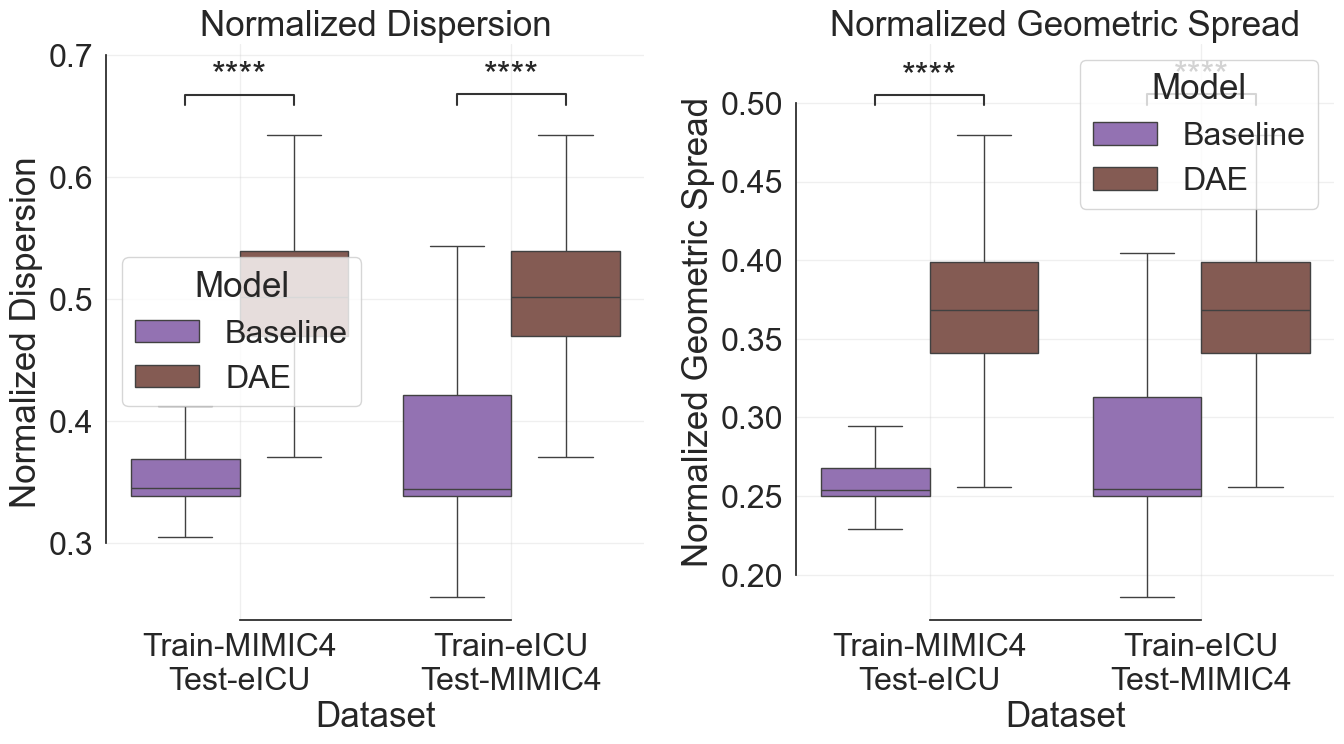

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

sns.set(font_scale=2.1, style='white')

# Initialize the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ---- First Box Plot ----
sns.boxplot(ax=axes[0], **hue_plot_params_disp, showfliers=False)

# Add statistical annotations
annotator = Annotator(axes[0], pairs, **hue_plot_params_disp, verbose=False)
annotator.configure(
    test="Mann-Whitney",
    correction_format="replace"
).apply_and_annotate()

# Customize the first plot
axes[0].grid(alpha=0.3)
axes[0].set_title('Normalized Dispersion')  # Adjust the title if necessary
sns.despine(ax=axes[0], trim=True)

# ---- Second Box Plot ----
sns.boxplot(ax=axes[1], **hue_plot_params_gs, showfliers=False)

# Add statistical annotations
annotator = Annotator(axes[1], pairs, **hue_plot_params_gs, verbose=False)
annotator.configure(
    test="Mann-Whitney",
    correction_format="replace"
).apply_and_annotate()

# Customize the second plot
axes[1].grid(alpha=0.3)
axes[1].set_title('Normalized Geometric Spread')  # Adjust the title if necessary
sns.despine(ax=axes[1], trim=True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plots
plt.show()
